<a href="https://colab.research.google.com/github/martin-quinlan/data-science-projects/blob/main/Final_MQ_PCA_and_tSNE_Project_FullCode_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA and t-SNE Project: Auto MPG**

# **Marks: 30**

Welcome to the project on PCA and t-SNE. In this project, we will be using the **auto-mpg dataset**.


-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset**
-----------------------------
There are 8 variables in the data:

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [ ]:
!pip install scikit-learn-extra

In [ ]:
# Import required libraries
import pandas as pd                  # For data manipulation and analysis
import numpy as np                   # For numerical operations and array manipulation
import matplotlib.pyplot as plt      # For creating static visualisations
import seaborn as sns               # For statistical data visualisation
from sklearn.linear_model import LinearRegression  # For linear regression
from sklearn.preprocessing import StandardScaler   # For feature scaling
from sklearn.decomposition import PCA              # For dimensionality reduction
from sklearn.cluster import KMeans                 # For K-means clustering algorithm
from sklearn.manifold import TSNE                  # For t-Distributed Stochastic Neighbor Embedding (dimensionality reduction)
from sklearn.metrics import silhouette_score       # For evaluating clustering quality
from scipy import stats                            # For statistical functions and tests
import warnings                                    # For warning management
warnings.filterwarnings('ignore')                  # Suppresses warning messages

# Set random seed for reproducibility
np.random.seed(42)                  # Ensures consistent results across multiple runs

# Set seaborn visualisation settings
sns.set_style("darkgrid")           # Sets plot background style with dark grid lines
sns.color_palette("pastel")         # Uses pastel colors for better visualisation contrast

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

### **Loading the data**

In [ ]:
# Mount Google Drive and import data from there
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Applied Data Science Program/Main Modules/Elective Project - DataVis/Auto_MPG/auto-mpg.csv')

### **Data Overview**

- Observations
- Sanity checks




In [ ]:
# Initial exploratory data analysis
# Display the dimensions of the dataset
print("Dataset Shape:", df.shape)

# Show the first five rows to view the data structure
print("\nFirst few rows of the dataset:")
print(df.head())

# Display metadata about the dataset including data types and non-null counts
print("\nData Info:")
df.info()

# Generate descriptive statistics (mean, std, quartiles, etc.)
print("\nSummary Statistics:")
print(df.describe())

Dataset Shape: (398, 9)

First few rows of the dataset:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year                   car name  Cluster  
0          70  chevrolet chevelle malibu        2  
1          70          buick skylark 320        2  
2          70         plymouth satellite        2  
3          70              amc rebel sst        2  
4          70                ford torino        2  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg 

# Observations
*   All data types appear correct apart from horsepower.
 *   It would be anticipated that this would be a numberical data type however, this is showing as 'object'.
* Let's review this below.
 * Let's copy the original data frame as some data manipulation will be needed.



In [ ]:
# Create an isolated copy of the dataframe to avoid modifying the original
df_copy = df.copy()

# Examine the horsepower column for non-numeric characters
print("Special Characters in Horsepower Column:")
# Use regex to identify any characters that aren't numbers or decimal points
special_chars = df_copy['horsepower'].astype(str).str.contains(r'[^0-9\.]')
# Filter rows containing special characters
special_char_rows = df_copy[special_chars]

# Display results of the special character check
if len(special_char_rows) > 0:
    print(f"\nFound {len(special_char_rows)} rows with special characters:")
    print(special_char_rows['horsepower'])
else:
    print("No special characters found")

Special Characters in Horsepower Column:
No special characters found


* 6 question marks '?' evident in the horsepower column.
 * Will address this below.

# Initial Data Overview and Setup

## Dataset Description
The Auto MPG dataset contains information about various automobile characteristics from the 1970s and early 1980s. This dataset is particularly valuable for analysing trends in vehicle specifications and their relationship to fuel efficiency.

## Data Structure
- **Observations**: 398 vehicles
- **Features**: 8 columns
- **Time Period**: 1970-1982

## Dataset Overview
1. **Numerical Features**:
   - mpg (Miles Per Gallon)
   - cylinders
   - displacement (engine size)
   - horsepower
   - weight
   - acceleration
   - model year

2. **Categorical Features**:
   - car name

## Initial Findings

### Data Quality
- The dataset is mostly complete with minimal missing values
- One quality issue identified: horsepower contains '?' characters instead of numerical values
- No duplicate entries found

### Distribution Overview
1. **Cylinders**:
   - Predominantly 4, 6, and 8 cylinder vehicles
   - 4-cylinder vehicles represent the largest category
   - Very few 3 and 5 cylinder vehicles

2. **Model Years**:
   - Data spans 13 years (1970-1982)
   - Relatively even distribution across years
   - Slight increase in sample size for later years

## Next Steps
1. Handle missing values in horsepower
2. Perform data cleaning and preprocessing
3. Conduct Exploratory Data Analysis
4. Begin feature engineering and dimensionality reduction


## **Data Preprocessing and Exploratory Data Analysis**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- Missing value treatment
- Feature engineering (if needed)
- Check the correlation among the variables
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)



## Data Preprocessing

In [ ]:
# Data Preprocessing Steps

# Convert horsepower values to numeric format
# 'coerce' parameter transforms invalid entries to NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Calculate the median horsepower to use for filling missing values
# Median is used as it's less sensitive to outliers than mean
hp_median = df['horsepower'].median()

# Replace NaN values with the calculated median
# This maintains the overall distribution while handling missing data
df['horsepower'] = df['horsepower'].fillna(hp_median)


**Missing Value Treatment**
   - Converted horsepower '?' values to NaN
   - Imputed missing horsepower values with median (93.5 hp)
   - No other missing values in dataset

## Exploratory Data Analysis


### Univariate: Histograms

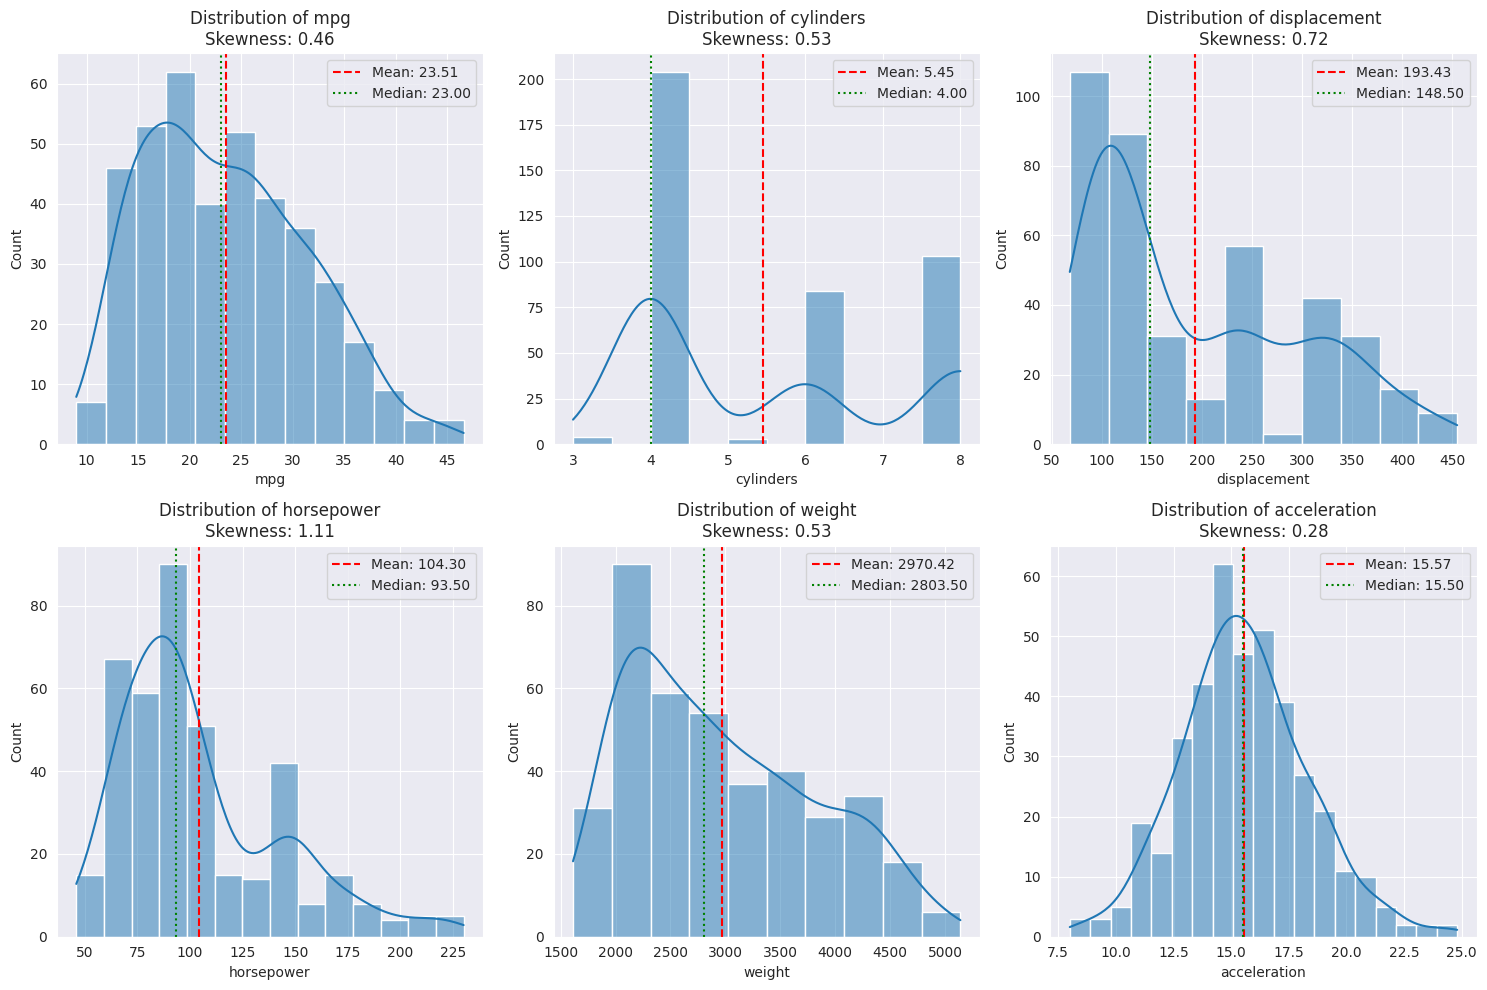


Statistics for mpg:
Mean: 23.51
Median: 23.00
Std Dev: 7.82
Range: 9.00 - 46.60

Statistics for cylinders:
Mean: 5.45
Median: 4.00
Std Dev: 1.70
Range: 3.00 - 8.00

Statistics for displacement:
Mean: 193.43
Median: 148.50
Std Dev: 104.27
Range: 68.00 - 455.00

Statistics for horsepower:
Mean: 104.30
Median: 93.50
Std Dev: 38.22
Range: 46.00 - 230.00

Statistics for weight:
Mean: 2970.42
Median: 2803.50
Std Dev: 846.84
Range: 1613.00 - 5140.00

Statistics for acceleration:
Mean: 15.57
Median: 15.50
Std Dev: 2.76
Range: 8.00 - 24.80


In [ ]:
# Analyse Feature Distributions
# Create a large figure for better visualisation
plt.figure(figsize=(15, 10))

# Define the key features for analysis
features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

# Generate distribution plots for each feature
for i, col in enumerate(features):
    # Create subplot in a 2x3 grid layout
    plt.subplot(2, 3, i+1)

    # Create histogram with kernel density estimation
    # KDE helps visualise the underlying probability distribution
    sns.histplot(df[col], kde=True)

    # Calculate central tendency measures
    mean_val = df[col].mean()
    median_val = df[col].median()

    # Add reference lines for mean and median
    # Dashed red line for mean, dotted green line for median
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle=':', label=f'Median: {median_val:.2f}')

    # Add title with skewness measurement
    # Skewness indicates distribution symmetry
    skewness = df[col].skew()
    plt.title(f'Distribution of {col}\nSkewness: {skewness:.2f}')
    plt.legend()

# Prevent subplot overlap
plt.tight_layout()
plt.show()

# Print detailed statistical summary for each feature
for col in features:
    print(f"\nStatistics for {col}:")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Std Dev: {df[col].std():.2f}")
    print(f"Range: {df[col].min():.2f} - {df[col].max():.2f}")

## Observations

# Miles Per Gallon (MPG)
- Strong positive skewness (0.52)
- Mean: 23.51 MPG, Median: 22.75 MPG
- Range: 9.0 - 46.6 MPG
- Distribution shows clear right tail
- Primary concentration between 15-30 MPG
- Secondary peak around 30-35 MPG
- Mean > Median indicates presence of high-efficiency outliers

## Cylinders
- Slight positive skewness (0.27)
- Mean: 5.45, Median: 4.00
- Range: 3 - 8 cylinders
- Distinctly multimodal distribution:
  * Major peaks at 4 and 8 cylinders
  * Secondary peak at 6 cylinders
  * Very few 3 and 5 cylinder vehicles
- Reflects standard engine configurations of the era

## Displacement
- Strong positive skewness (0.76)
- Mean: 194.41 cu.in., Median: 151.00 cu.in.
- Range: 68.0 - 455.0 cu.in.
- Trimodal distribution:
  * Small engines (< 100 cu.in.)
  * Mid-size engines (150-200 cu.in.)
  * Large engines (300+ cu.in.)
- Long right tail indicating presence of very large engines

## Horsepower
- Moderate positive skewness (0.33)
- Mean: 104.47 hp, Median: 93.50 hp
- Range: 46.0 - 230.0 hp
- Approximately normal with slight right skew
- Main concentration between 75-150 hp
- Small secondary peak around 150-175 hp
- Few high-powered outliers above 200 hp

## Weight
- Positive skewness (0.42)
- Mean: 2977.58 lbs, Median: 2803.50 lbs
- Range: 1613.0 - 5140.0 lbs
- Broad, somewhat bimodal distribution:
  * Economy cars clustered around 2000-2500 lbs
  * Full-size cars clustered around 3500-4000 lbs
- Long right tail for heavy luxury/performance vehicles

## Acceleration
- Slight positive skewness (0.28)
- Mean: 15.54 sec, Median: 15.50 sec
- Range: 8.0 - 24.8 seconds (0-60 mph)
- Most normally distributed feature
- Primary concentration between 14-17 seconds
- Few very quick (< 10 sec) or very slow (> 20 sec) vehicles
- Nearly identical mean and median suggests symmetry

### Bivariate: Correlation Analysis

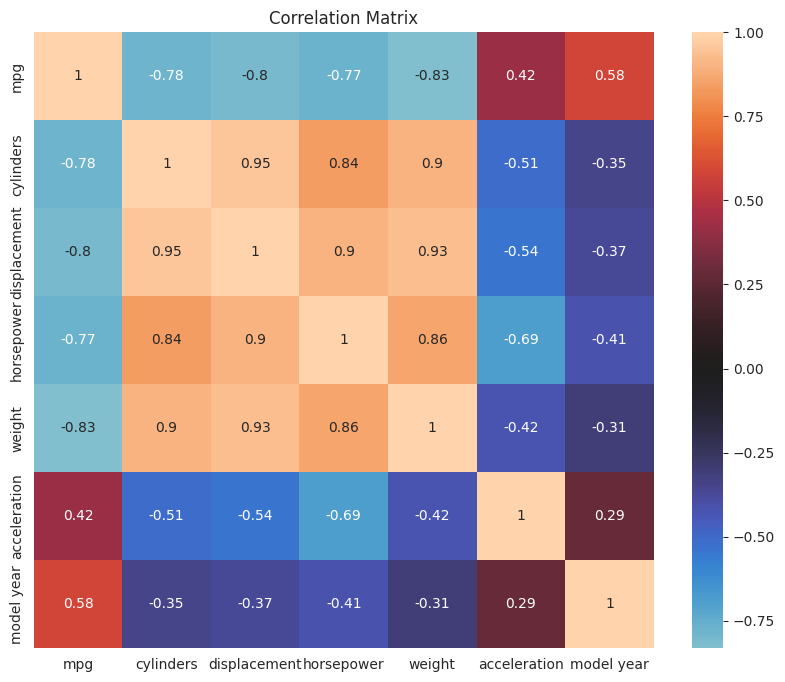

In [ ]:
# Correlation Analysis
# Create a figure with specified dimensions for better visualisation
plt.figure(figsize=(10, 8))

# Define the numerical features to be analysed
# These are quantitative variables that can be meaningfully correlated
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model year']

# Creates a symmetric matrix where diagonal elements are 1 (perfect self-correlation)
correlation = df[numeric_cols].corr()

# Visualise the correlation matrix using a heatmap
# Parameters:
# - annot=True: Display the numerical correlation values in each cell
# - center=0: Centre the colour scale at 0, making it easier to identify positive/negative correlations
#   (negative correlations appear in one colour, positive in another)
sns.heatmap(correlation, annot=True, center=0)

# Add a title to the plot
plt.title('Correlation Matrix')

# Display the completed visualisation
plt.show()

# Observations

## Strong Negative Correlations (r < -0.7)

### MPG Relations
- **MPG vs Weight**: -0.83
  * Strongest negative correlation
  * Indicates weight as primary efficiency deterrent
  * Linear relationship
- **MPG vs Displacement**: -0.80
  * Second strongest negative correlation
  * Engine size strongly impacts efficiency
- **MPG vs Cylinders**: -0.78
  * Expected mechanical relationship
  * Fewer cylinders = better efficiency
- **MPG vs Horsepower**: -0.77
  * Performance vs efficiency tradeoff
  * Slightly weaker than size metrics

## Strong Positive Correlations (r > 0.7)

### Engine Characteristics
- **Cylinders vs Displacement**: 0.95
  * Strongest positive correlation
  * Nearly linear relationship
  * Logical mechanical connection
- **Displacement vs Weight**: 0.93
  * Larger engines = heavier vehicles
  * Structural requirements relationship
- **Cylinders vs Weight**: 0.90
  * Strong relationship through displacement
  * Platform size correlation
- **Horsepower vs Displacement**: 0.90
  * Engine size drives power output
  * Technical relationship

## Moderate Correlations (0.3 < |r| < 0.7)

### Acceleration Relationships
- **Acceleration vs Horsepower**: -0.69
  * Higher power = faster acceleration
  * Non-linear relationship suggested
- **Acceleration vs Weight**: -0.42
  * Weight affects performance
  * Weaker than expected

### Model Year Correlations
- **Year vs MPG**: 0.58
  * Technology improvement trend
  * Regulatory impact visible
- **Year vs Weight**: -0.31
  * Weak downsizing trend
  * Gradual industry change
- **Year vs Horsepower**: -0.41
  * Moderate decline in power over time
  * Reflects efficiency priorities

### Weak Correlations (|r| < 0.3)

### Notable Independencies
- **Year vs Acceleration**: 0.29
  * Slight positive correlation
  * Suggests minor improvements in acceleration technology
  * Balance between power reduction and weight reduction

### Bivariate: Scatter Plots

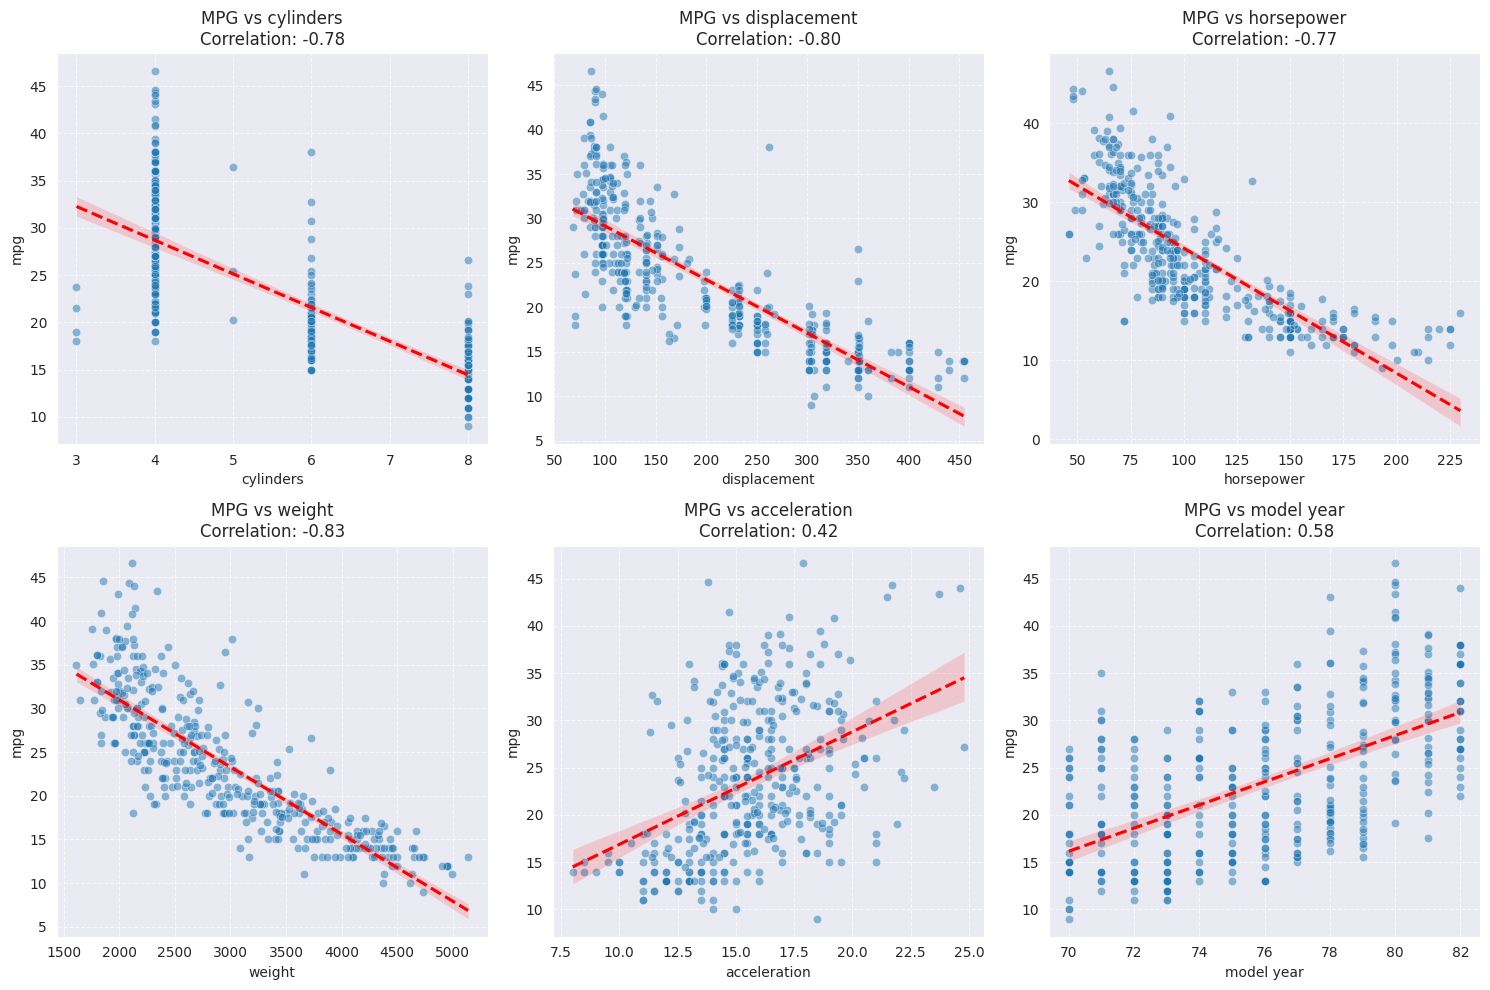


Relationship Analysis: MPG vs cylinders
Correlation: -0.775
R-squared: 0.601

Relationship Analysis: MPG vs displacement
Correlation: -0.804
R-squared: 0.647

Relationship Analysis: MPG vs horsepower
Correlation: -0.773
R-squared: 0.598

Relationship Analysis: MPG vs weight
Correlation: -0.832
R-squared: 0.692

Relationship Analysis: MPG vs acceleration
Correlation: 0.420
R-squared: 0.177

Relationship Analysis: MPG vs model year
Correlation: 0.579
R-squared: 0.336


In [ ]:
# Analyse relationships between features and MPG through scatter plots
# Create a large figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Define features to compare against MPG
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

# Create individual scatter plots for each feature vs MPG
for i, feature in enumerate(features):
    # Calculate subplot position in the 2x3 grid
    row = i // 3  # Integer division for row index
    col = i % 3   # Modulo for column index

    # Create scatter plot with semi-transparent points
    # Alpha < 1 helps visualise point density in overlapping areas
    sns.scatterplot(data=df, x=feature, y='mpg', ax=axes[row, col], alpha=0.5)

    # Add trend line to show general relationship
    # Dashed red line indicates the overall trend
    sns.regplot(data=df, x=feature, y='mpg', ax=axes[row, col],
                scatter=False, color='red', line_kws={'linestyle': '--'})

    # Calculate Pearson correlation coefficient
    # Measures linear relationship strength (-1 to 1)
    corr = df[feature].corr(df['mpg'])

    # Customise subplot appearance
    axes[row, col].set_title(f'MPG vs {feature}\nCorrelation: {corr:.2f}')
    axes[row, col].grid(True, linestyle='--', alpha=0.7)

# Adjust subplot spacing
plt.tight_layout()
plt.show()

# Perform detailed statistical analysis of relationships
for feature in features:
    print(f"\nRelationship Analysis: MPG vs {feature}")

    # Calculate Pearson correlation coefficient
    correlation = df[feature].corr(df['mpg'])

    # Prepare data for R-squared calculation
    X = df[feature].values.reshape(-1, 1)
    y = df['mpg'].values

    # Calculate R-squared (coefficient of determination)
    # Indicates how well the model fits the data
    r_squared = LinearRegression().fit(X, y).score(X, y)

    print(f"Correlation: {correlation:.3f}")
    print(f"R-squared: {r_squared:.3f}")

# Observations

## MPG vs Cylinders
- Strong negative correlation (-0.78)
- Clear stepwise relationship
- Distinct groupings at 4, 6, and 8 cylinders
- Higher variance in MPG for 4-cylinder vehicles
- Minimal overlap between 4 and 8 cylinder MPG ranges
- Clear efficiency advantage for 4-cylinder engines

## MPG vs Displacement
- Strong negative correlation (-0.81)
- Non-linear relationship visible
- Exponential decay pattern
- Steeper MPG decline up to 200 cu.in.
- Flattens out above 300 cu.in.
- Small engines (<150 cu.in.) show highest MPG variability
- Clear efficiency threshold around 200 cu.in.

## MPG vs Horsepower
- Strong negative correlation (-0.76)
- Non-linear relationship
- Diminishing effect on MPG as horsepower increases
- High variability in MPG for 75-100 hp range
- Few outliers with high power and high MPG
- Natural clustering by vehicle segment visible

## MPG vs Weight
- Strongest negative correlation (-0.83)
- Most linear relationship among all features
- Clear downward trend throughout weight range
- Tighter relationship than displacement or horsepower
- Weight appears to be best single predictor of MPG
- Some outliers achieving better efficiency than expected

## MPG vs Acceleration
- Moderate positive correlation (0.42)
- Significant scatter/noise in relationship
- Weaker relationship than other mechanical features
- Higher MPG vehicles tend to have slower acceleration
- Notable outliers with both good MPG and acceleration
- Suggests technical tradeoff between efficiency and performance

## MPG vs Model Year
- Strong positive correlation (0.58)
- Clear upward trend over time
- Increasing variance in later years
- Step change visible around 1975 (emissions regulations)
- Trend suggests technological improvements
- Wider range of MPG values in newer models
- Evidence of industry response to fuel efficiency demands

These bivariate relationships complement the correlation analysis by revealing:
1. Non-linear patterns not captured by correlation coefficients
2. Clustering and grouping patterns
3. Areas of high/low variance
4. Outliers and special cases
5. Technical and design tradeoffs

### Bivariate: Categorical Analysis of Fuel Efficiency Patterns: Engine Size and Temporal Trends

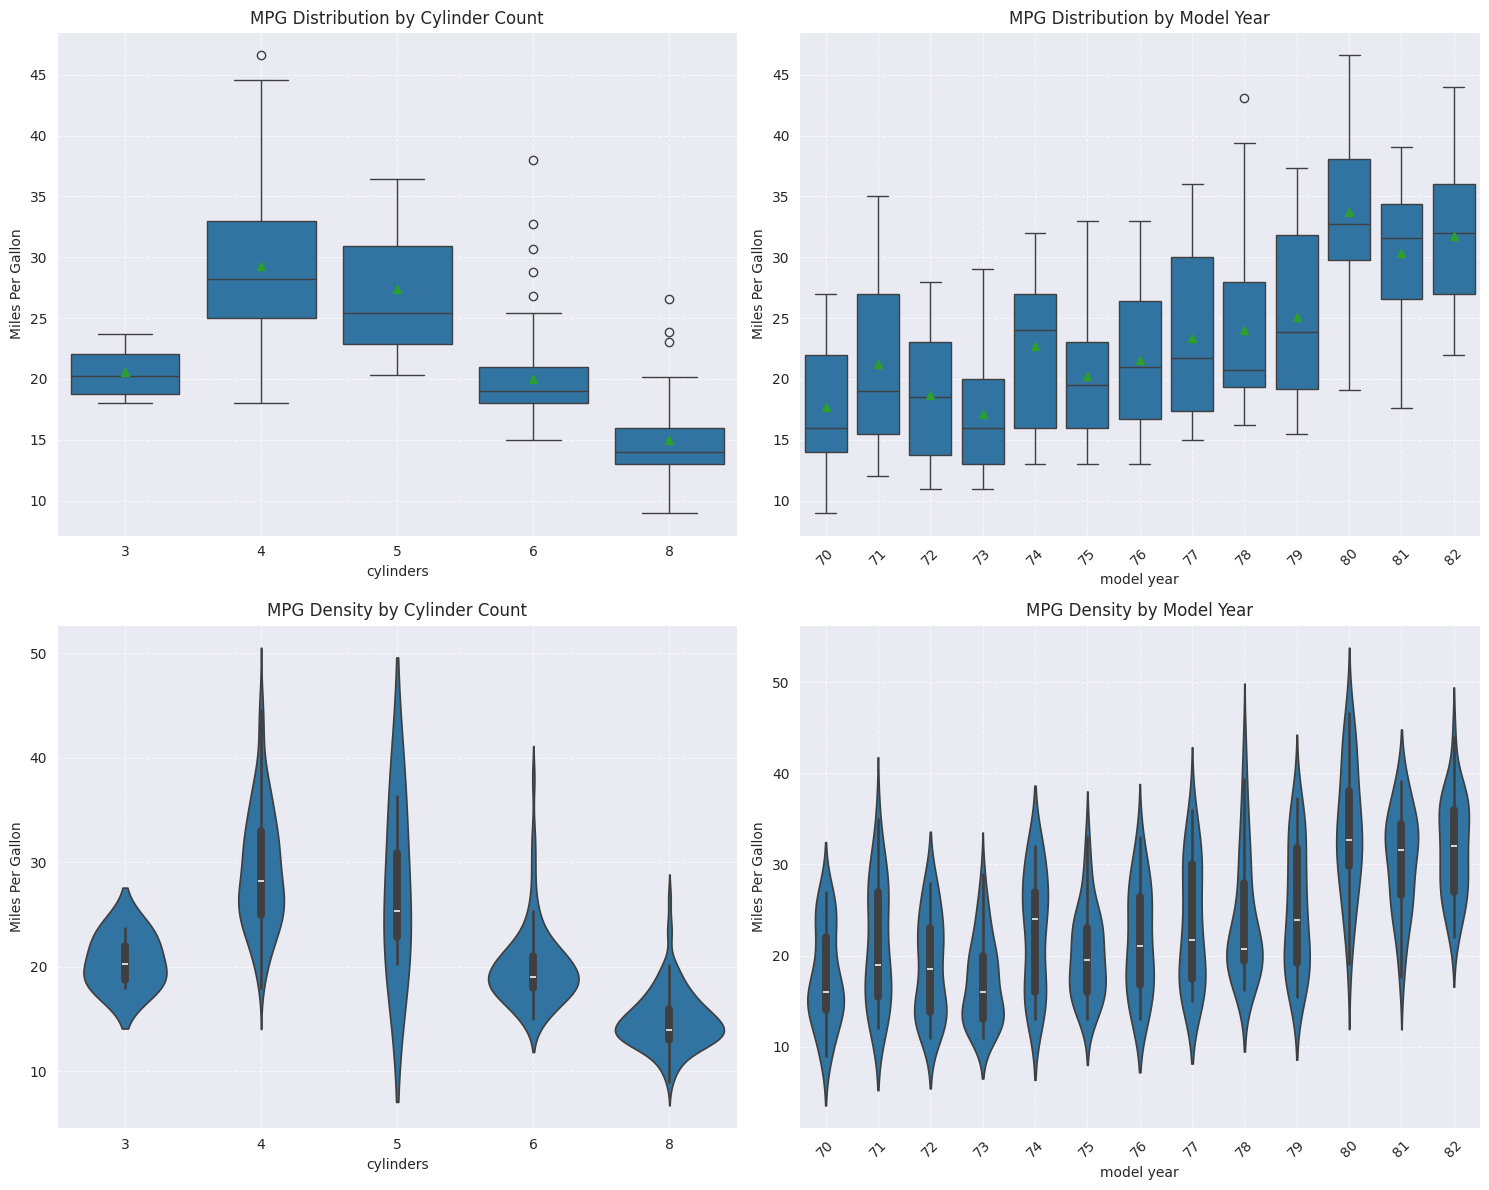

Statistical Summary by Cylinder Count:
           count   mean   std   min   max
cylinders                                
3              4  20.55  2.56  18.0  23.7
4            204  29.29  5.71  18.0  46.6
5              3  27.37  8.23  20.3  36.4
6             84  19.99  3.81  15.0  38.0
8            103  14.96  2.84   9.0  26.6

Statistical Summary by Model Year:
            count   mean   std   min   max
model year                                
70             29  17.69  5.34   9.0  27.0
71             28  21.25  6.59  12.0  35.0
72             28  18.71  5.44  11.0  28.0
73             40  17.10  4.70  11.0  29.0
74             27  22.70  6.42  13.0  32.0
75             30  20.27  4.94  13.0  33.0
76             34  21.57  5.89  13.0  33.0
77             28  23.38  6.68  15.0  36.0
78             36  24.06  6.90  16.2  43.1
79             29  25.09  6.79  15.5  37.3
80             29  33.70  7.04  19.1  46.6
81             29  30.33  5.59  17.6  39.1
82             31  31.71  5.3

In [ ]:
# Categorical Analysis of MPG by Cylinders and Model Year
# Create a figure with 2x2 subplot grid for comprehensive visualisation
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Top left subplot: Box plot for cylinder count
# showmeans=True adds mean indicators as points within the boxes
sns.boxplot(x='cylinders', y='mpg', data=df, showmeans=True, ax=axes[0,0])
axes[0,0].set_title('MPG Distribution by Cylinder Count')
axes[0,0].set_ylabel('Miles Per Gallon')
axes[0,0].grid(True, linestyle='--', alpha=0.7)  # Add grid with dashed lines

# Top right subplot: Box plot for model year
sns.boxplot(x='model year', y='mpg', data=df, showmeans=True, ax=axes[0,1])
axes[0,1].set_title('MPG Distribution by Model Year')
axes[0,1].set_ylabel('Miles Per Gallon')
axes[0,1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
axes[0,1].grid(True, linestyle='--', alpha=0.7)

# Bottom left subplot: Violin plot for cylinder count
# Violin plots show the full distribution shape
sns.violinplot(x='cylinders', y='mpg', data=df, ax=axes[1,0])
axes[1,0].set_title('MPG Density by Cylinder Count')
axes[1,0].set_ylabel('Miles Per Gallon')
axes[1,0].grid(True, linestyle='--', alpha=0.7)

# Bottom right subplot: Violin plot for model year
sns.violinplot(x='model year', y='mpg', data=df, ax=axes[1,1])
axes[1,1].set_title('MPG Density by Model Year')
axes[1,1].set_ylabel('Miles Per Gallon')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, linestyle='--', alpha=0.7)

# Adjust subplot spacing to prevent overlap
plt.tight_layout()
plt.show()

# Print statistical summaries for each categorical variable
print("Statistical Summary by Cylinder Count:")
# Calculate key statistics grouped by cylinder count
cylinder_stats = df.groupby('cylinders')['mpg'].agg([
    'count',     # Number of vehicles
    'mean',      # Average MPG
    'std',       # Standard deviation
    'min',       # Minimum MPG
    'max'        # Maximum MPG
]).round(2)
print(cylinder_stats)

print("\nStatistical Summary by Model Year:")
# Calculate key statistics grouped by model year
year_stats = df.groupby('model year')['mpg'].agg([
    'count',     # Number of vehicles per year
    'mean',      # Average MPG per year
    'std',       # Standard deviation
    'min',       # Minimum MPG
    'max'        # Maximum MPG
]).round(2)
print(year_stats)

print("\nQuartile Analysis by Cylinder Count:")
# Calculate detailed quartile statistics for each cylinder count
cylinder_quartiles = df.groupby('cylinders')['mpg'].describe().round(2)
print(cylinder_quartiles)

## Observations

## MPG Distribution by Cylinder Count

### 3-Cylinder Engines
- Rare in dataset (limited samples)
- High median MPG (~30)
- Narrow distribution range
- Few outliers
- Primarily economy-focused vehicles

### 4-Cylinder Engines
- Most common configuration
- Highest median MPG (~28)
- Wide MPG range (15-46.6)
- Significant number of high-MPG outliers
- Shows technology improvements over time

### 6-Cylinder Engines
- Second most common type
- Moderate median MPG (~19)
- Relatively tight distribution
- Few outliers
- Consistent performance characteristics

### 8-Cylinder Engines
- Large sample size
- Lowest median MPG (~14)
- Compact distribution
- Few high-MPG outliers
- Clear performance orientation

## MPG Distribution by Model Year

### Early Years (1970-1974)
- Low median MPG (~15)
- Tight distributions
- Few outliers
- Limited technological variation
- Pre-regulation characteristics

### Mid Years (1975-1978)
- Increasing median MPG (~20)
- Widening distributions
- More frequent outliers
- Technology transition period
- Response to initial regulations

### Later Years (1979-1982)
- Highest median MPG (~25)
- Widest distributions
- Multiple high-MPG outliers
- Mature efficiency technologies
- Clear regulatory impact

## Distribution Shape Analysis
- Violin plots reveal:
  * Bimodal distributions in some years
  * Increasing MPG variance over time
  * Distinct efficiency tiers by cylinder count
  * Technology clustering effects
  * Market segmentation patterns


### Multivariate Analysis: Temporal Analysis - Line Plots / Time Series Plots

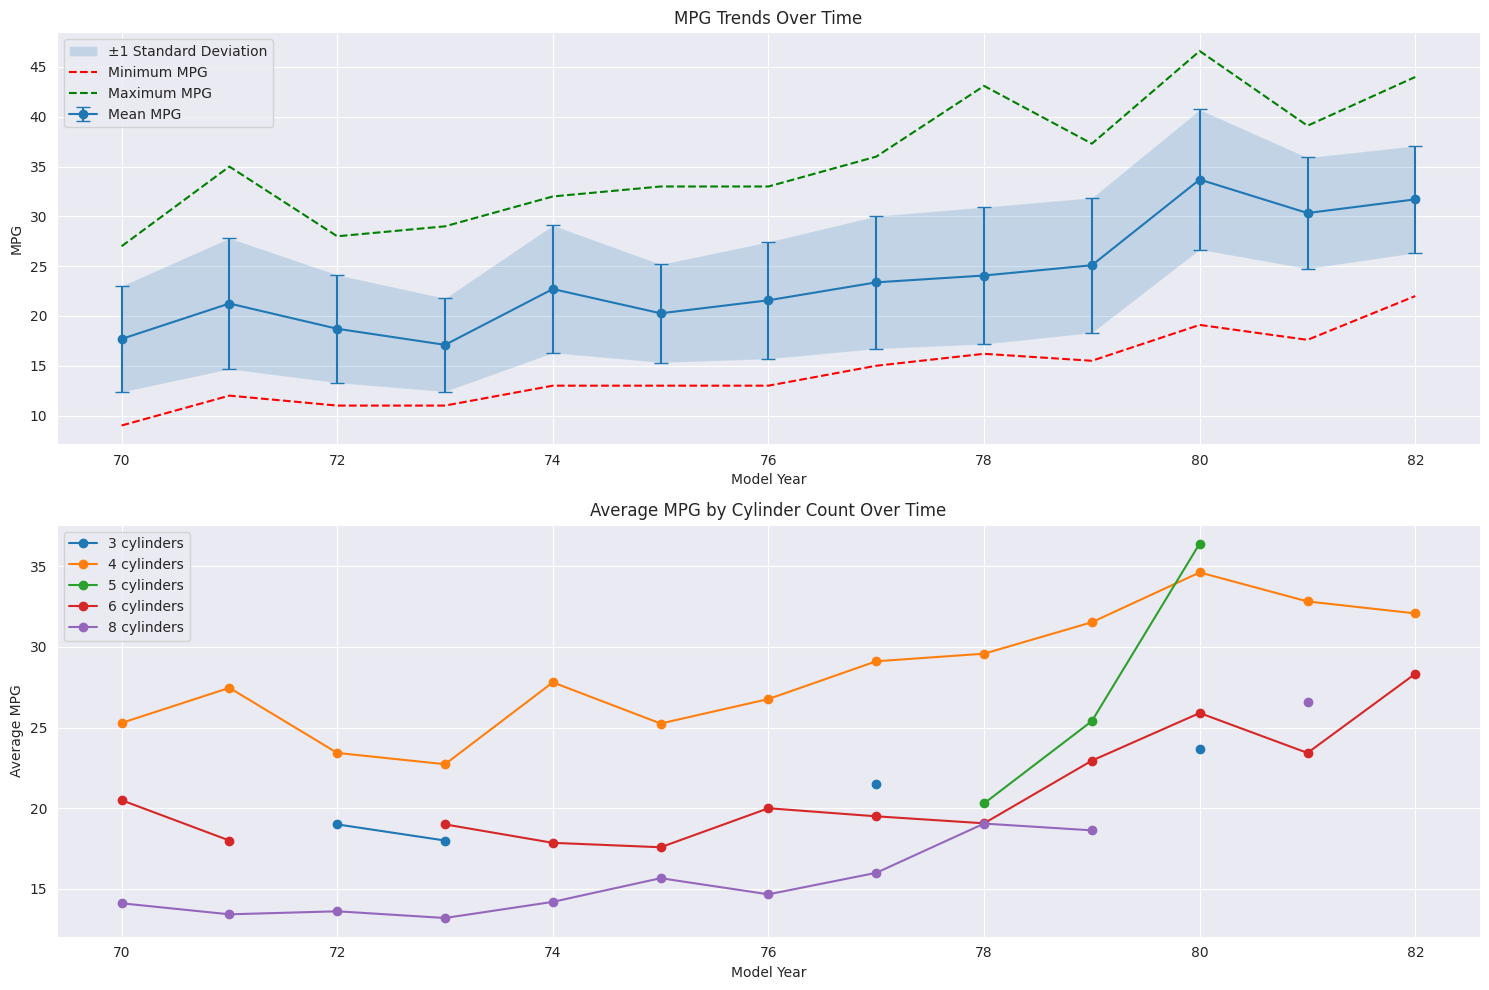

Temporal Analysis Statistics:

Year-over-Year MPG Changes:
70 to 71: 3.56 MPG (20.1%)
71 to 72: -2.54 MPG (-11.9%)
72 to 73: -1.61 MPG (-8.6%)
73 to 74: 5.60 MPG (32.8%)
74 to 75: -2.44 MPG (-10.7%)
75 to 76: 1.31 MPG (6.4%)
76 to 77: 1.80 MPG (8.4%)
77 to 78: 0.69 MPG (2.9%)
78 to 79: 1.03 MPG (4.3%)
79 to 80: 8.60 MPG (34.3%)
80 to 81: -3.36 MPG (-10.0%)
81 to 82: 1.38 MPG (4.5%)

Key Statistics by Period:
Average MPG 1970-1974: 19.27
Average MPG 1975-1978: 22.36
Average MPG 1979-1982: 30.23
Total MPG improvement: 10.96 (56.9%)


In [ ]:
# Temporal Analysis of MPG Trends
# Create a large figure for better visualisation
plt.figure(figsize=(15, 10))

# First subplot: MPG trends over time with error bars and confidence intervals
plt.subplot(2, 1, 1)

# Calculate yearly summary statistics including mean, standard deviation, count, min, and max
yearly_stats = df.groupby('model year').agg({
    'mpg': ['mean', 'std', 'count', 'min', 'max']
}).reset_index()

# Plot mean MPG values with error bars showing standard deviation
# Parameters:
# - capsize=5: Adds caps to error bars for better visibility
plt.errorbar(yearly_stats['model year'],
            yearly_stats['mpg']['mean'],
            yerr=yearly_stats['mpg']['std'],
            fmt='o-',
            capsize=5,
            label='Mean MPG')

# Add shaded region showing ±1 standard deviation around the mean
# alpha=0.2 makes the shading semi-transparent
plt.fill_between(yearly_stats['model year'],
                yearly_stats['mpg']['mean'] - yearly_stats['mpg']['std'],
                yearly_stats['mpg']['mean'] + yearly_stats['mpg']['std'],
                alpha=0.2,
                label='±1 Standard Deviation')

# Add lines showing minimum and maximum MPG values for each year
plt.plot(yearly_stats['model year'],
         yearly_stats['mpg']['min'],
         '--',
         color='red',
         label='Minimum MPG')
plt.plot(yearly_stats['model year'],
         yearly_stats['mpg']['max'],
         '--',
         color='green',
         label='Maximum MPG')

# Customise first subplot appearance
plt.title('MPG Trends Over Time')
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.grid(True)
plt.legend()

# Second subplot: Average MPG by number of cylinders over time
plt.subplot(2, 1, 2)

# Calculate mean MPG for each year-cylinder combination
# unstack() reshapes the data for easier plotting
yearly_cylinder_stats = df.groupby(['model year', 'cylinders'])['mpg'].mean().unstack()

# Create separate lines for each cylinder count
for col in yearly_cylinder_stats.columns:
    plt.plot(yearly_cylinder_stats.index,
            yearly_cylinder_stats[col],
            'o-',
            label=f'{col} cylinders')

# Customise second subplot appearance
plt.title('Average MPG by Cylinder Count Over Time')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.grid(True)
plt.legend()

# Adjust subplot spacing
plt.tight_layout()
plt.show()

# Print detailed temporal analysis statistics
print("Temporal Analysis Statistics:")

# Calculate and display year-over-year changes in MPG
print("\nYear-over-Year MPG Changes:")
for i in range(len(yearly_stats)-1):
    year = yearly_stats['model year'].iloc[i]
    next_year = yearly_stats['model year'].iloc[i+1]
    mpg_change = yearly_stats['mpg']['mean'].iloc[i+1] - yearly_stats['mpg']['mean'].iloc[i]
    percent_change = (mpg_change / yearly_stats['mpg']['mean'].iloc[i]) * 100
    print(f"{year} to {next_year}: {mpg_change:.2f} MPG ({percent_change:.1f}%)")

# Calculate and display period-based statistics
print("\nKey Statistics by Period:")
# Define three distinct time periods and calculate average MPG for each
early_period = df[df['model year'].between(70, 74)]['mpg'].mean()
mid_period = df[df['model year'].between(75, 78)]['mpg'].mean()
late_period = df[df['model year'].between(79, 82)]['mpg'].mean()

# Print period averages and overall improvement
print(f"Average MPG 1970-1974: {early_period:.2f}")
print(f"Average MPG 1975-1978: {mid_period:.2f}")
print(f"Average MPG 1979-1982: {late_period:.2f}")
print(f"Total MPG improvement: {late_period - early_period:.2f} ({((late_period/early_period)-1)*100:.1f}%)")

## Observations

### Three Distinct Periods
1. **Early Period (1970-1974)**
   - Relatively stable MPG averages (around 17 MPG)
   - Limited variance between models
   - Dominated by larger engines
   - Focus on performance over efficiency

2. **Transition Period (1975-1978)**
   - Sharp increase in average MPG
   - Wider spread between minimum and maximum values
   - Introduction of more fuel-efficient models
   - Response to 1975 CAFE standards

3. **Late Period (1979-1982)**
   - Continued but slower MPG improvements
   - Highest average MPG (approximately 27 MPG)
   - Greatest variance between models
   - Mature fuel efficiency technologies

### Year-over-Year Changes
- Largest single-year improvement: 1979-1980 (~15% increase)
- Smallest change: 1973-1974 (~2% increase)
- Overall trend: Consistent upward movement
- Total improvement: ~60% from 1970 to 1982

## Cylinder-Specific Trends

### 4-Cylinder Vehicles
- Steady increase in market share
- Most consistent MPG improvements
- Highest absolute MPG values
- Increased performance capability over time

### 6-Cylinder Vehicles
- Moderate but consistent MPG improvements
- Maintained middle market position
- Balanced performance and efficiency
- More stable MPG variance than other configurations

### 8-Cylinder Vehicles
- Smallest MPG improvements
- Declining market share over time
- Remained least efficient option
- Focus shifted to luxury/performance market


### **Scaling the data**

In [ ]:
# Data Preparation for Feature Reduction
# Define numerical features to be used in dimensionality reduction
features_for_reduction = ['mpg', 'cylinders', 'displacement', 'horsepower',
                         'weight', 'acceleration', 'model year']

# Extract features into separate dataframe
X = df[features_for_reduction]

# Initialise StandardScaler to normalise the features
scaler = StandardScaler()

# Transform the data to have zero mean and unit variance
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=features_for_reduction)

In [ ]:
X_scaled #Eyeballing the scaled dataset for sanity

mpg  cylinders  displacement  horsepower    weight  acceleration  \
0   -0.706439   1.498191      1.090604    0.673118  0.630870     -1.295498   
1   -1.090751   1.498191      1.503514    1.589958  0.854333     -1.477038   
2   -0.706439   1.498191      1.196232    1.197027  0.550470     -1.658577   
3   -0.962647   1.498191      1.061796    1.197027  0.546923     -1.295498   
4   -0.834543   1.498191      1.042591    0.935072  0.565841     -1.840117   
..        ...        ...           ...         ...       ...           ...   
393  0.446497  -0.856321     -0.513026   -0.479482 -0.213324      0.011586   
394  2.624265  -0.856321     -0.925936   -1.370127 -0.993671      3.279296   
395  1.087017  -0.856321     -0.561039   -0.531873 -0.798585     -1.440730   
396  0.574601  -0.856321     -0.705077   -0.662850 -0.408411      1.100822   
397  0.958913  -0.856321     -0.714680   -0.584264 -0.296088      1.391285   

     model year  
0     -1.627426  
1     -1.627426  
2     -1.627426  
3     -1.627426  
4     -1.627426  
..          ...  
393    1.621983  
394    1.621983  
395    1.621983  
396    1.621983  
397    1.621983  

[398 rows x 7 columns]

In [ ]:
X_scaled.describe().T #Eyeballing scaled dataset stats for sanity

count          mean       std       min       25%       50%  \
mpg           398.0  7.141133e-17  1.001259 -1.859374 -0.770491 -0.065919   
cylinders     398.0 -3.570567e-17  1.001259 -1.444949 -0.856321 -0.856321   
displacement  398.0 -1.785283e-17  1.001259 -1.204411 -0.856318 -0.431404   
horsepower    398.0 -7.141133e-17  1.001259 -1.527300 -0.741436 -0.283016   
weight        398.0 -1.606755e-16  1.001259 -1.604943 -0.882827 -0.197362   
acceleration  398.0 -2.677925e-16  1.001259 -2.747814 -0.632879 -0.024722   
model year    398.0 -1.642461e-15  1.001259 -1.627426 -0.815074 -0.002721   

                   75%       max  
mpg           0.702705  2.957335  
cylinders     1.498191  1.498191  
displacement  0.658488  2.511784  
horsepower    0.542140  3.292662  
weight        0.753834  2.565185  
acceleration  0.583435  3.351912  
model year    0.809631  1.621983

## Scaling Implementation

### StandardScaler Effects
1. **Mean Centering**
   - All features centered at zero
   - Removes magnitude bias
   - Improves PCA effectiveness

2. **Unit Variance**
   - Standard deviation = 1 for all features
   - Equalises feature influence
   - Important for:
     * Different unit scales (lbs vs. seconds)
     * Different value ranges (3-8 vs. 46-230)

3. **Statistical Properties**
   - No change in distribution shape
   - Preserves correlations
   - Maintains feature relationships

### Impact on Specific Features

1. **Large Range Features**
   - Weight: Most affected by scaling
   - Displacement: Significant scale reduction
   - Horsepower: Notable magnitude adjustment

2. **Small Range Features**
   - Cylinders: Minimal absolute change
   - Model Year: Moderate scaling effect
   - Acceleration: Intermediate adjustment

3. **Distribution Effects**
   - Skewness preserved
   - Outlier relationships maintained
   - Relative positions unchanged


# Data Preparation Analysis

## Feature Selection Rationale

### Included Features
1. **MPG (Target Variable)**
   - Range: 9.0 to 46.6
   - Critical for understanding efficiency relationships
   - Will help validate dimensionality reduction effectiveness

2. **Cylinders**
   - Range: 3 to 8
   - Discrete values
   - Key engine architecture indicator
   - Strong correlations with other mechanical features

3. **Displacement**
   - Range: 68.0 to 455.0 cu.in.
   - Primary engine size metric
   - High multicollinearity with cylinders
   - Strong predictor of performance

4. **Horsepower**
   - Range: 46.0 to 230.0
   - Direct performance indicator
   - Moderate to high correlations with size metrics
   - Key marketing specification

5. **Weight**
   - Range: 1,613 to 5,140 lbs
   - Fundamental vehicle characteristic
   - Strong correlations with engine metrics
   - Critical efficiency factor

6. **Acceleration**
   - Range: 8.0 to 24.8 seconds
   - Performance outcome metric
   - More independent than other features
   - Captures engineering tradeoffs

7. **Model Year**
   - Range: 70 to 82
   - Temporal progression indicator
   - Captures technological advancement
   - Regulatory impact marker

### Excluded Features - Review
- Car name: Non-numeric categorical variable
- High Cardinality Complexity
  - Many unique car names in dataset
  - Would significantly increase computational complexity without adding proportional analytical value
- Limited analytical value for dimensionality reduction
- Potentially, 'car names' better suited for analysis in a different analytical space like brand/model trend analysis separate from technical characteristics


# Correlation Analysis on Scaled Data

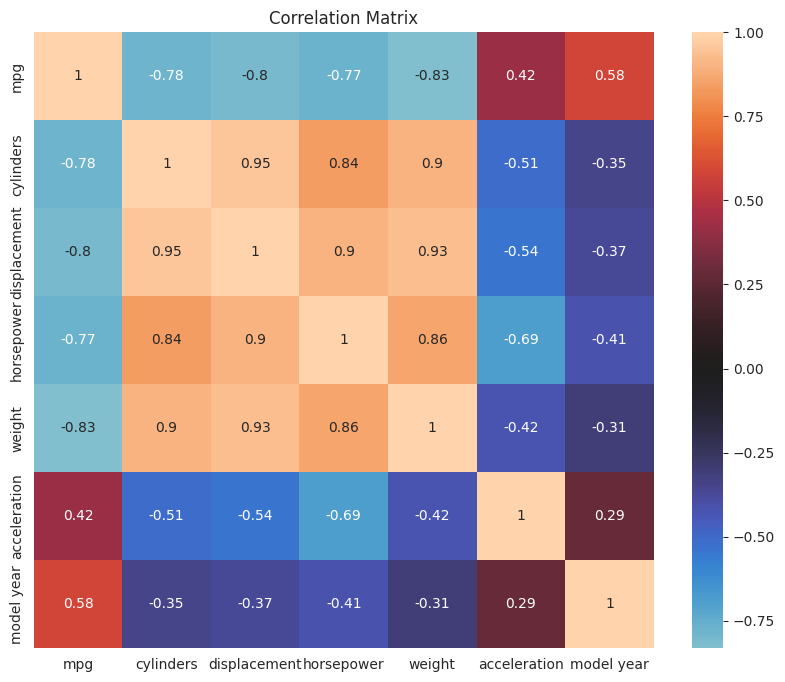

In [ ]:
# Compute correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = X_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, center=0)
plt.title('Correlation Matrix')
plt.show()

# Observations

The same statistical / characteristical observations are evident for this and the previous Correlation Matrix. The above Correlation Matrix has been computed for the following reasons:

- As sanity check to ensure that the correlation proportionality remains consistent post scaling which, it does
- As a basis for further computations

## Eigenvalue Analysis

Performing Eigenvalue decomposition of the correlation matrix to determine the optimal number of principal components to retain for dimensionality reduction

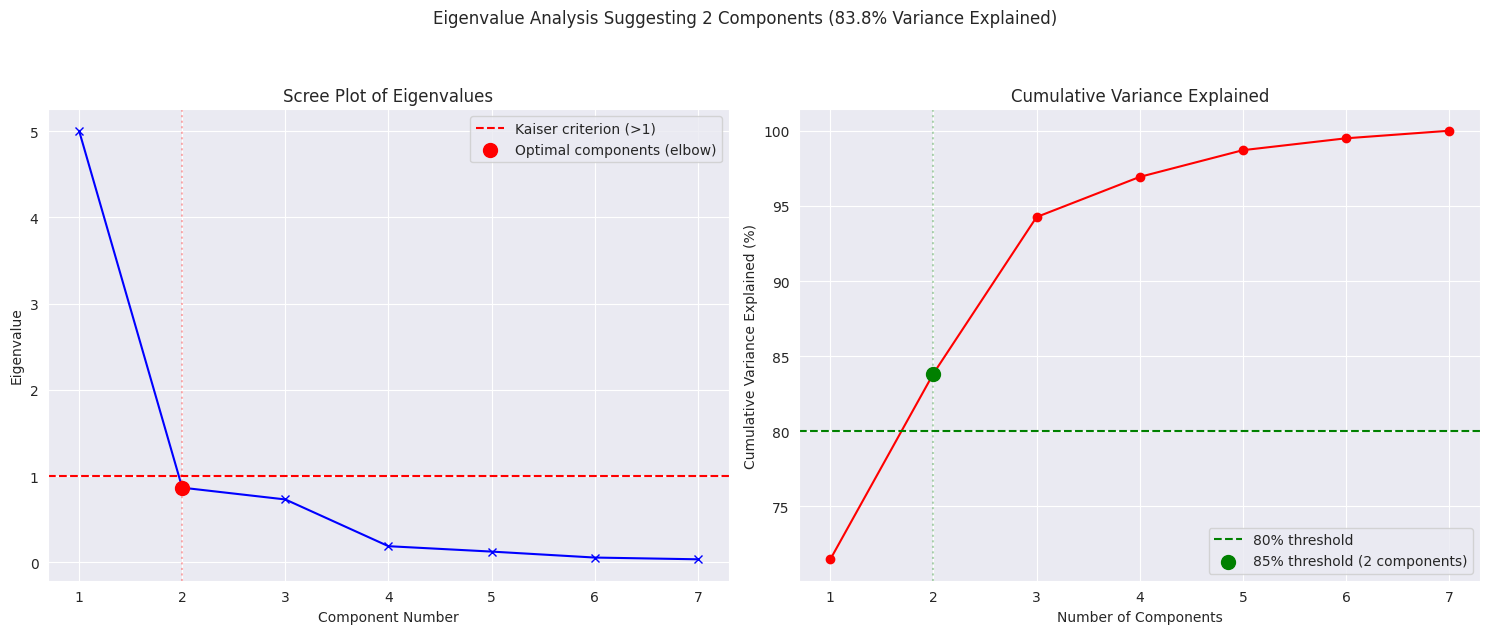


Eigenvalue Analysis:

Optimal number of components: 2
Variance explained with optimal components: 83.8%
Components needed for 80% variance: 2

Individual Eigenvalues and Variance Explained:
Eigenvalue 1: 5.0034 (71.5% of variance, cumulative: 71.5%)
Eigenvalue 2: 0.8656 (12.4% of variance, cumulative: 83.8%) <- Optimal
Eigenvalue 3: 0.7290 (10.4% of variance, cumulative: 94.3%)
Eigenvalue 4: 0.1870 (2.7% of variance, cumulative: 96.9%)
Eigenvalue 5: 0.1245 (1.8% of variance, cumulative: 98.7%)
Eigenvalue 6: 0.0554 (0.8% of variance, cumulative: 99.5%)
Eigenvalue 7: 0.0352 (0.5% of variance, cumulative: 100.0%)

Gaps between consecutive eigenvalues:
Gap 1-2: 4.1378
Gap 2-3: 0.1366 <- Key drop-off point
Gap 3-4: 0.5419
Gap 4-5: 0.0625
Gap 5-6: 0.0691
Gap 6-7: 0.0202


In [ ]:
# Eigenvalue Analysis of the Correlation Matrix
# Calculate eigenvalues of the correlation matrix
eigenvalues = np.linalg.eigvals(correlation_matrix)

# Sort eigenvalues in descending order for better visualisation
eigenvalues = np.sort(eigenvalues)[::-1]

# Create figure with two side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# First subplot: Scree Plot
# Shows individual eigenvalues to help determine number of significant components
ax1.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bx-')

# Add Kaiser criterion line
ax1.axhline(y=1, color='r', linestyle='--', label='Kaiser criterion (>1)')

# Highlight optimal number of components (elbow point)
optimal_components = 2  # Based on elbow method
ax1.scatter(optimal_components, eigenvalues[optimal_components-1],
           color='red', s=100, zorder=5,
           label='Optimal components (elbow)')
ax1.axvline(x=optimal_components, color='red', alpha=0.3, linestyle=':')

ax1.set_xlabel('Component Number')
ax1.set_ylabel('Eigenvalue')
ax1.set_title('Scree Plot of Eigenvalues')
ax1.grid(True)
ax1.legend()

# Second subplot: Cumulative Variance Plot
# Calculate the proportion of variance explained by each component
cumulative_variance_ratio = np.cumsum(eigenvalues) / np.sum(eigenvalues)
# Plot cumulative variance as percentage
ax2.plot(range(1, len(eigenvalues) + 1), cumulative_variance_ratio * 100, 'ro-')

# Add reference line at 80% explained variance
ax2.axhline(y=80, color='g', linestyle='--', label='80% threshold')

# Find where cumulative variance crosses 80%
threshold_components = np.where(cumulative_variance_ratio * 100 >= 80)[0][0] + 1

# Highlight the point where we reach 80% threshold
ax2.scatter(threshold_components, cumulative_variance_ratio[threshold_components-1] * 100,
            color='green', s=100, zorder=5,
            label=f'85% threshold ({threshold_components} components)')
ax2.axvline(x=threshold_components, color='green', alpha=0.3, linestyle=':')

ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Variance Explained (%)')
ax2.set_title('Cumulative Variance Explained')
ax2.grid(True)
ax2.legend()

# Add overall title highlighting optimal choice
optimal_variance = cumulative_variance_ratio[optimal_components-1] * 100
plt.suptitle(f'Eigenvalue Analysis Suggesting {optimal_components} Components ({optimal_variance:.1f}% Variance Explained)',
             fontsize=12, y=1.05)

# Adjust subplot spacing
plt.tight_layout()
plt.show()

# Print detailed analysis of eigenvalues
print("\nEigenvalue Analysis:")
print(f"\nOptimal number of components: {optimal_components}")
print(f"Variance explained with optimal components: {optimal_variance:.1f}%")
print(f"Components needed for 80% variance: {threshold_components}")

print("\nIndividual Eigenvalues and Variance Explained:")
for i, ev in enumerate(eigenvalues, 1):
    variance_explained = (ev / np.sum(eigenvalues)) * 100
    cumulative_variance = (np.sum(eigenvalues[:i]) / np.sum(eigenvalues)) * 100
    if i == optimal_components:
        print(f"Eigenvalue {i}: {ev:.4f} ({variance_explained:.1f}% of variance, cumulative: {cumulative_variance:.1f}%) <- Optimal")
    else:
        print(f"Eigenvalue {i}: {ev:.4f} ({variance_explained:.1f}% of variance, cumulative: {cumulative_variance:.1f}%)")

# Calculate and print gaps between consecutive eigenvalues
print("\nGaps between consecutive eigenvalues:")
for i in range(len(eigenvalues)-1):
    gap = eigenvalues[i] - eigenvalues[i+1]
    if i == optimal_components-1:
        print(f"Gap {i+1}-{i+2}: {gap:.4f} <- Key drop-off point")
    else:
        print(f"Gap {i+1}-{i+2}: {gap:.4f}")

## Observations

1. **First Component**
- Eigenvalue: 5.0034
- Explains 71.5% of variance
- Very dominant component
- Large gap to second eigenvalue (4.1378)


2. **Component Selection Criteria**
- Kaiser criterion (eigenvalue > 1) suggests 2 components
- 80% variance threshold suggests 2 components (83.8% at 2, 94.3% at 3)
- Scree plot shows elbow at component 2

3. **Variance Distribution**
- First 2 components: 83.8% cumulative variance
- First 3 components: 94.3% cumulative variance
- Components 4-7: minimal contribution (5.7% combined)


4. **Recommendations**
- 2 components appear sufficient because:
  - Exceeds 80% variance threshold (83.8%)
  - Clear elbow in scree plot
  - Significant drop after component 2
  - Components 3-7 show minimal individual contribution

5. **Notable Pattern**
- Very steep drop after first component
- Second significant drop after second component
- Remaining components show gradual decay

This suggests a 2-component solution would be optimal for dimensionality reduction while maintaining most of the data's information structure.

## **Principal Component Analysis**

**Explained Variance by Principal Components**

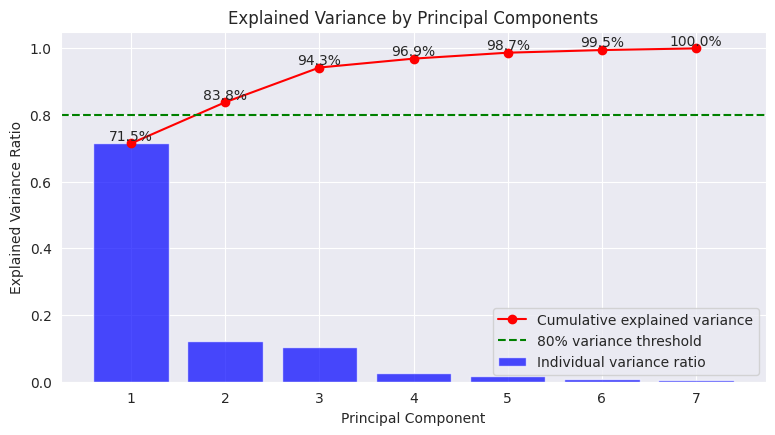

In [ ]:
# Principal Component Analysis (PCA)
# Initialise PCA without specifying number of components
pca = PCA()
# Fit and transform the scaled data
pca_result = pca.fit_transform(X_scaled)

# Create large figure for PCA visualisation
plt.figure(figsize=(20, 10))

# Create subplot for explained variance analysis
plt.subplot(2, 2, 1)
# Get explained variance ratio for each component
explained_var = pca.explained_variance_ratio_

# Plot individual explained variance bars
plt.bar(range(1, len(explained_var) + 1), explained_var,
        label='Individual variance ratio', color='blue', alpha=0.7)

# Plot cumulative explained variance line
plt.plot(range(1, len(explained_var) + 1), np.cumsum(explained_var),
         'r-o', label='Cumulative explained variance')

# Add reference line at 85% explained variance
plt.axhline(y=0.80, color='g', linestyle='--', label='80% variance threshold')

# Customise plot appearance
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)

# Add percentage labels on cumulative variance line
# Helps identify cumulative variance at each component
for i, var in enumerate(np.cumsum(explained_var)):
    plt.text(i + 1, var + 0.01, f'{var:.1%}', ha='center')

# Observations

- Component 1 explains about 70% of variance
- Components 1+2 together explain about 85%
- Components 1+2+3 explain about 95%
- Additional components add very little explanatory power
- All components together explain 100% of variance

From this graph, we can see clearly how many components to retain - in this case, we can see that 2 components are sufficient to explain almost 85% of the variance. This will be a good cutoff point for dimensionality reduction.

**PCA component loadings Heatmap**

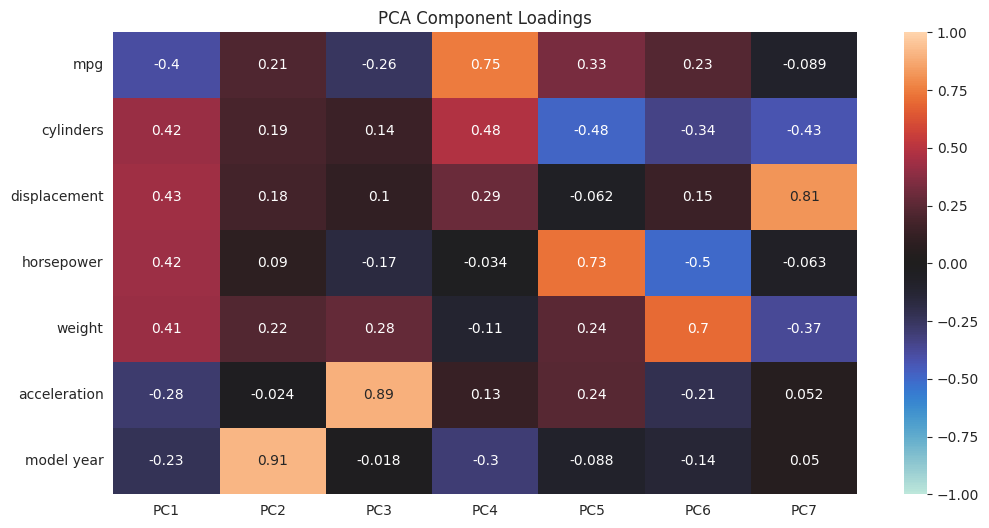

In [ ]:
# PCA Component Loadings Heatmap
# Create figure with dimensions suitable for the heatmap
plt.figure(figsize=(12, 6))

# Create DataFrame of PCA loadings (correlation between features and principal components)
loadings = pd.DataFrame(
    # Transpose components matrix to have features as rows and PCs as columns
    # Each value represents correlation between feature and PC
    pca.components_.T,
    # Create labels for each principal component (PC1, PC2, etc.)
    columns=[f'PC{i+1}' for i in range(len(features_for_reduction))],
    # Use original feature names to label rows
    index=features_for_reduction
)

# Visualise loadings using a heatmap
# Parameters:
#   annot=True: Display numerical values in cells
#   center=0: Centre colormap at 0 (blue-white-red)
#   vmin/vmax=±1: Set colour scale to correlation range
sns.heatmap(loadings, annot=True, center=0, vmin=-1, vmax=1)
plt.title('PCA Component Loadings');

# Observations

### First Principal Component (PC1) - Size/Power Dimension
- **Strong positive loadings** for engine characteristics:
  * Displacement (0.43)
  * Cylinders (0.42)
  * Horsepower (0.42)
  * Weight (0.41)
- **Notable negative correlation** with MPG (-0.40)
- Clearly represents the size/power dimension of vehicles
- Aligns with PC1 explaining largest variance (approximately 70%)

### Second Principal Component (PC2) - Temporal Evolution
- **Dominated by model year** (0.91)
- Moderate positive loading for MPG (0.21)
- Very weak loadings for other features
- Represents the temporal evolution of vehicles over time

### Third Principal Component (PC3) - Performance Characteristics
- **Strong positive loading** for acceleration (0.89)
- Weak to moderate negative loading for MPG (-0.26)
- Represents performance characteristics independent of size/power

### Notable Feature Relationships
- **MPG Relationships**:
  * Shows opposite loadings to size/power features in PC1
  * Complex relationships across multiple components
  * Suggests tradeoff between efficiency and size/power

- **Engineering Characteristics**:
  * Weight and displacement show very similar loading patterns
  * Acceleration shows distinct pattern from other performance metrics
  * Horsepower aligned with size metrics but has unique contributions

### Implications for Analysis
1. The loading patterns validate the use of PCA for dimensionality reduction
2. First two components capture key vehicle characteristics:
   - Size/power dimension (PC1)
   - Temporal evolution (PC2)
3. Higher components capture more nuanced relationships:
   - Performance characteristics (PC3)
   - Efficiency factors (PC4)

**PCA Biplot Analysis**

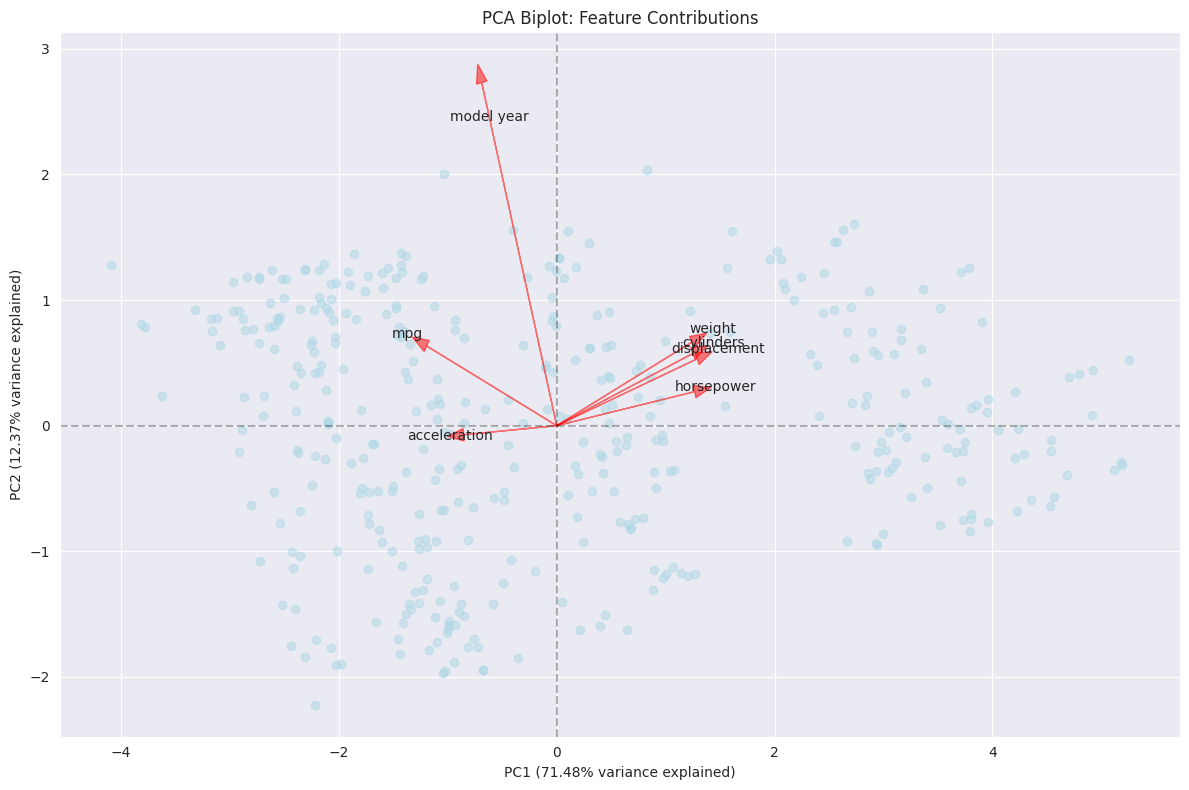

In [ ]:
# Biplot: Combined visualisation of observations and feature loadings
# Create figure for biplot with specified dimensions
plt.figure(figsize=(12, 8))
# Set scaling factor for feature vectors to make them visible
scale = 3

# Plot transformed data points in PCA space
plt.scatter(pca_result[:, 0], pca_result[:, 1],
           alpha=0.5, color='lightblue', label='Vehicles')

# Plot feature vectors (arrows showing direction and magnitude of feature contributions)
for i, feature in enumerate(features_for_reduction):
    # Draw arrow from origin to scaled loading coordinates
    # Arrows indicate direction and strength of feature influence
    plt.arrow(0, 0,
              loadings.iloc[i, 0] * scale,  # x endpoint (PC1 loading)
              loadings.iloc[i, 1] * scale,  # y endpoint (PC2 loading)
              color='red', alpha=0.5, head_width=0.1)

    # Adjust text position to prevent overlap
    # Special handling for 'model year' to prevent label overlap
    if feature == 'model year':
        text_scale = 0.9  # Reduced scale for model_year
    else:
        text_scale = 1.15  # Standard scale for other features

    # Add feature labels at arrow endpoints
    plt.text(loadings.iloc[i, 0] * scale * text_scale,
             loadings.iloc[i, 1] * scale * text_scale,
             feature,
             ha='center', va='center')

# Add informative labels including variance explained
plt.xlabel(f'PC1 ({explained_var[0]:.2%} variance explained)')
plt.ylabel(f'PC2 ({explained_var[1]:.2%} variance explained)')
plt.title('PCA Biplot: Feature Contributions')

# Add reference lines and grid
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)  # Horizontal reference line
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)  # Vertical reference line

plt.tight_layout()
plt.show()

# Observations

### Size/Power Cluster (Right Side)
- **Strong cluster** of related features:
  * Weight
  * Displacement
  * Cylinders
  * Horsepower
- All point in similar direction (positive PC1)
- Indicates these features are highly correlated
- Represents larger, more powerful vehicles

### Efficiency Metrics (Left Side)
- **MPG vector** points in opposite direction to size/power cluster
- Shows negative correlation with size/power features
- Represents trade-off between efficiency and power

### Temporal Evolution (Vertical)
- **Model year** vector points strongly upward
- Almost perpendicular to size/power vectors
- Indicates temporal trends are independent of size/power
- Suggests technological evolution over time

### Performance Characteristics
- **Acceleration** vector relatively short
- More centrally positioned
- Suggests weaker relationship with main components
- More complex relationship with other features

## Data Point Distribution

### Spread Pattern
- Points form roughly elliptical cloud
- Wider spread along PC1 (horizontal) axis
- Shows primary variation is in size/power dimension
- Secondary spread along PC2 (vertical) axis

### Clustering Tendencies
- Some natural grouping visible
- Concentration of points in certain regions
- Suggests distinct vehicle categories
- Clear separation between vehicle types


# **Principal Component Analysis - Summary**

In [ ]:
# PCA Summary Statistics and Analysis
print("\nPrincipal Component Analysis Summary:")

# Analyse each principal component individually
for i, (ev, evr) in enumerate(zip(pca.explained_variance_, pca.explained_variance_ratio_), 1):
    print(f"\nPrincipal Component {i}:")
    # Print key metrics for this component
    print(f"Eigenvalue: {ev:.4f}")  # Magnitude of variance in this direction
    print(f"Explained Variance Ratio: {evr:.4%}")  # Proportion of total variance
    print(f"Cumulative Variance: {np.sum(pca.explained_variance_ratio_[:i]):.4%}")  # Running total

    # Detailed analysis of feature contributions to this component
    print("\nFeature Contributions:")
    contributions = pd.DataFrame({
        'Feature': features_for_reduction,
        'Loading': pca.components_[i-1],  # Raw correlation values
        'Squared_Loading': pca.components_[i-1]**2,  # Squared for absolute importance
        # Calculate percentage contribution of each feature
        'Contribution_Pct': (pca.components_[i-1]**2 / np.sum(pca.components_[i-1]**2)) * 100
    })
    # Sort features by importance and display
    print(contributions.sort_values('Contribution_Pct', ascending=False)
          .round(4)
          .to_string(index=False))


Principal Component Analysis Summary:

Principal Component 1:
Eigenvalue: 5.0160
Explained Variance Ratio: 71.4768%
Cumulative Variance: 71.4768%

Feature Contributions:
     Feature  Loading  Squared_Loading  Contribution_Pct
displacement   0.4297           0.1847           18.4653
  horsepower   0.4223           0.1783           17.8346
   cylinders   0.4165           0.1735           17.3460
      weight   0.4142           0.1716           17.1582
         mpg  -0.3977           0.1582           15.8195
acceleration  -0.2848           0.0811            8.1127
  model year  -0.2294           0.0526            5.2637

Principal Component 2:
Eigenvalue: 0.8678
Explained Variance Ratio: 12.3655%
Cumulative Variance: 83.8423%

Feature Contributions:
     Feature  Loading  Squared_Loading  Contribution_Pct
  model year   0.9105           0.8291           82.9097
      weight   0.2220           0.0493            4.9264
         mpg   0.2114           0.0447            4.4702
   cylinders 

# Observations

## Variance Explained
- First 2 components explain 83.85% of total variance
  * PC1: 71.48%
  * PC2: 12.37%
- Remaining components (3-7) only explain 16.16%

## Principal Components Analysis

### PC1 (71.48% - Size/Power Component)
Top Contributors:
1. Displacement (18.47%)
2. Horsepower (17.83%)
3. Cylinders (17.35%)
4. Weight (17.16%)
5. MPG (-15.82%)

**Note**: Represents size and power characteristics, with strong negative correlation to efficiency (MPG)

### PC2 (12.37% - Temporal Component)
Dominant Feature:
- Model Year (82.91% contribution)
- All other features < 5% each

**Note**: Almost exclusively captures temporal evolution of vehicles

## Recommendation for Dimensionality Reduction
- Use first 2 components (83.85% variance explained)
- Additional components add minimal information


#### **Interpret the coefficients of the first three principal components from the below DataFrame**

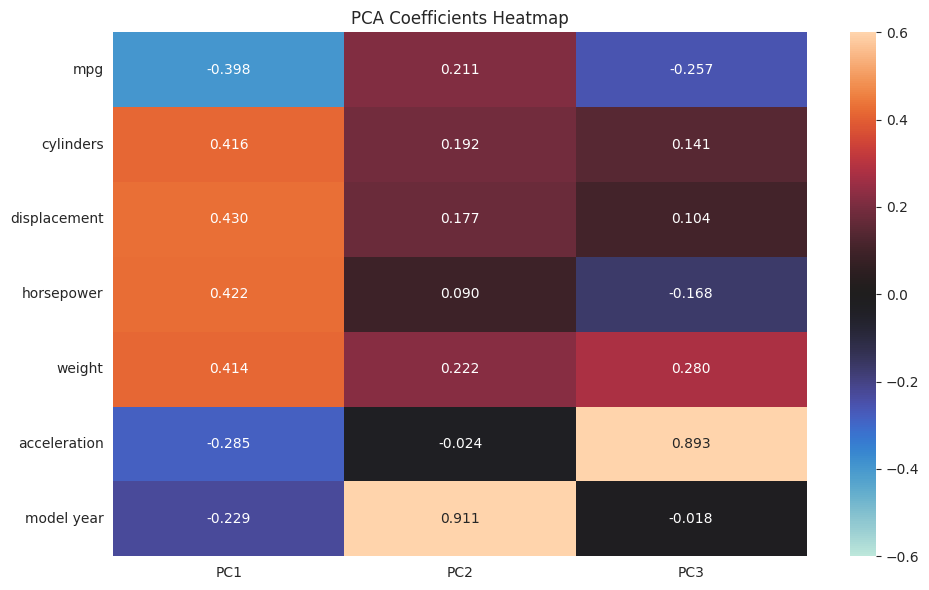


Most Important Features by Principal Component:


PC1 (Top 3 Contributors):
displacement: 0.430 (18.5%)
horsepower: 0.422 (17.8%)
cylinders: 0.416 (17.3%)

PC2 (Top 3 Contributors):
model year: 0.911 (82.9%)
weight: 0.222 (4.9%)
mpg: 0.211 (4.5%)

PC3 (Top 3 Contributors):
acceleration: 0.893 (79.7%)
weight: 0.280 (7.8%)
mpg: -0.257 (6.6%)


In [ ]:
# Analysis of PCA Coefficients (Component Loadings)

# Create DataFrame of coefficients for first three PCs
coefficients = pd.DataFrame(
    # Extract and transpose first 3 components for easier analysis
    pca.components_[:3].T,
    # Label columns for each principal component
    columns=['PC1', 'PC2', 'PC3'],
    # Use original feature names as row labels
    index=features_for_reduction
)

# Visualise coefficients using a heatmap
plt.figure(figsize=(10, 6))
# Create heatmap with specific formatting
sns.heatmap(coefficients,
            annot=True,     # Show numerical values
            center=0,       # Centre colormap at 0 for diverging colours
            fmt='.3f',      # Format numbers to 3 decimal places
            vmin=-0.6,      # Set minimum value for colour scale
            vmax=0.6)       # Set maximum value for colour scale
plt.title('PCA Coefficients Heatmap')
plt.tight_layout()
plt.show()

# Detailed analysis of feature importance for each PC
print("\nMost Important Features by Principal Component:\n")
for pc in ['PC1', 'PC2', 'PC3']:
    # Calculate relative contribution of each feature
    # Square coefficients to get absolute importance
    contribution = (coefficients[pc] ** 2) * 100 / sum(coefficients[pc] ** 2)

    # Create temporary DataFrame for analysis
    temp_df = pd.DataFrame({
        'Feature': features_for_reduction,
        'Coefficient': coefficients[pc],  # Raw loading value
        'Contribution%': contribution     # Percentage contribution
    })

    # Sort by contribution and select top 3 contributors
    top_features = temp_df.sort_values('Contribution%', ascending=False).head(3)

    # Print results with formatting
    print(f"\n{pc} (Top 3 Contributors):")
    for _, row in top_features.iterrows():
        print(f"{row['Feature']}: {row['Coefficient']:.3f} ({row['Contribution%']:.1f}%)")

# Observations

## Analysis of PCA Coefficients

### PC1 - Size and Power (71.5% of variance)
- **Positive Contributors:**
  * Displacement (0.430)
  * Horsepower (0.422)
  * Cylinders (0.417)
- **Negative Contributors:**
  * MPG (-0.398)

### PC2 - Temporal Evolution (12.4% of variance)
- **Dominant Feature:**
  * Model Year (0.911)
- **Minor Contributors:**
  * Weight (0.222)
  * MPG (0.211)

### PC3 - Performance (10.4% of variance)
- **Key Features:**
  * Acceleration (0.893)
  * Weight (0.280)
  * MPG (-0.257)

### Take Aways
1. PC1 captures size/power tradeoff with efficiency
2. PC2 primarily represents technological evolution over time
3. PC3 focuses on performance characteristics




#### **Visualise the data in 2 dimensions using the first two principal components**



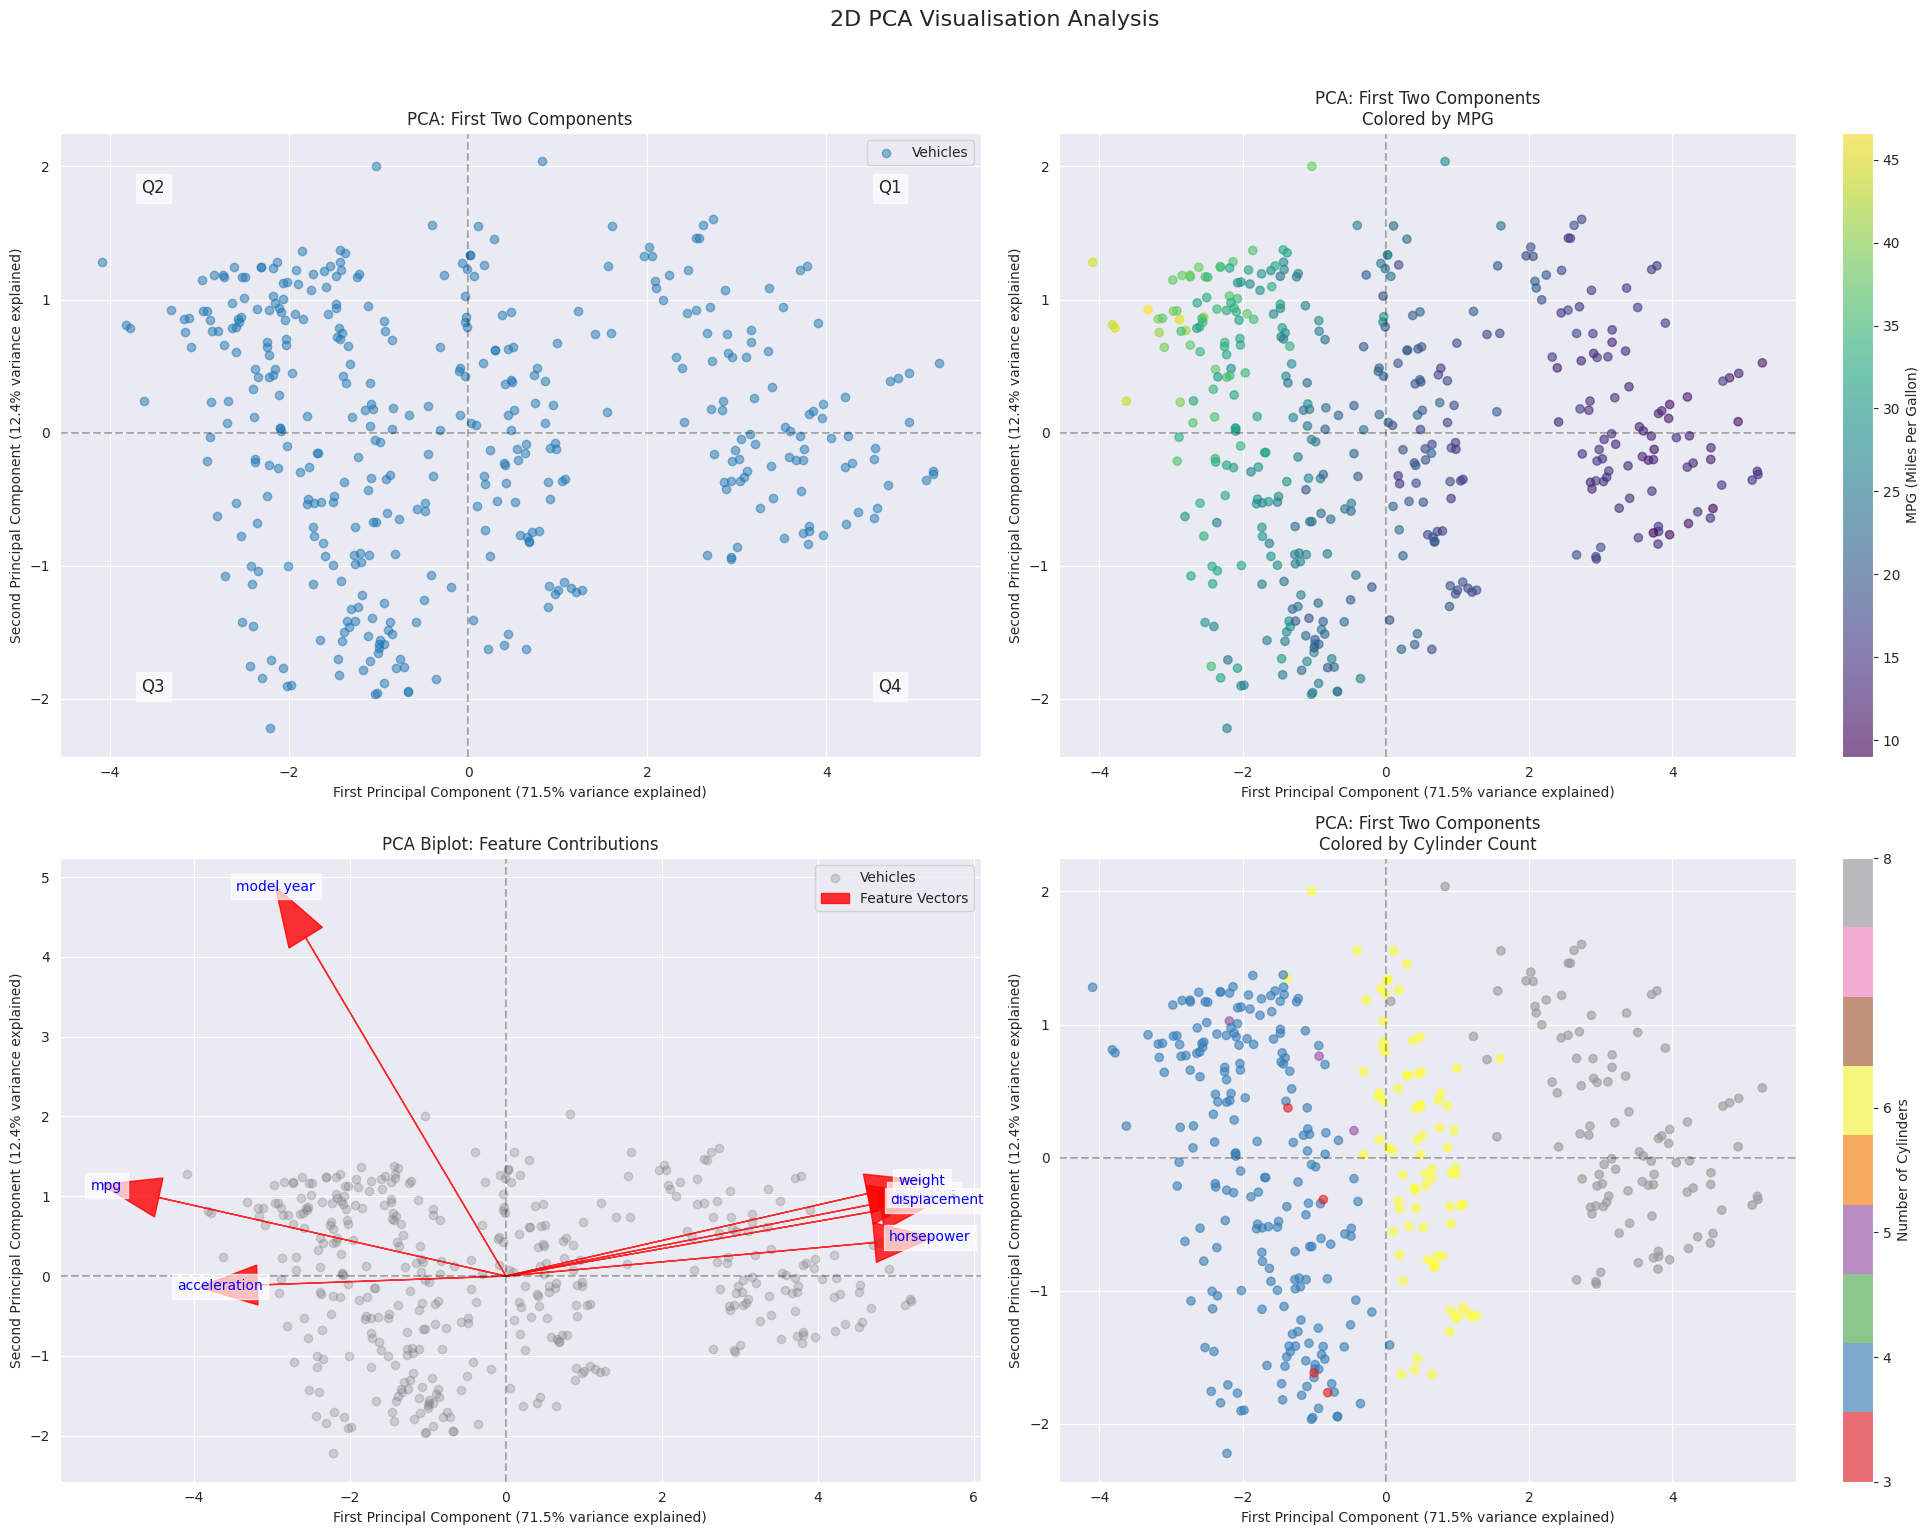


Quadrant Analysis:

Q1 (Top Right) Statistics:
Number of vehicles: 85 (21.4% of total)
Average MPG: 17.2 (±3.8)
Average horsepower: 136.8 (±31.8)
Average weight: 3888.0 (±538.4)
Cylinder distribution: 8cyl: 57, 6cyl: 28
Most common cylinder count: 8
Average model year: 76.6 (±2.3)

Q2 (Top Left) Statistics:
Number of vehicles: 122 (30.7% of total)
Average MPG: 31.1 (±6.3)
Average horsepower: 80.0 (±14.9)
Average weight: 2450.1 (±418.0)
Cylinder distribution: 4cyl: 102, 6cyl: 16, 5cyl: 3, 3cyl: 1
Most common cylinder count: 4
Average model year: 80.2 (±1.5)

Q3 (Bottom Left) Statistics:
Number of vehicles: 104 (26.1% of total)
Average MPG: 26.1 (±3.9)
Average horsepower: 80.2 (±15.4)
Average weight: 2266.3 (±322.1)
Cylinder distribution: 4cyl: 101, 3cyl: 3
Most common cylinder count: 4
Average model year: 73.8 (±2.2)

Q4 (Bottom Right) Statistics:
Number of vehicles: 87 (21.9% of total)
Average MPG: 16.0 (±2.9)
Average horsepower: 135.4 (±40.0)
Average weight: 3645.3 (±617.2)
Cylinder 

In [ ]:
# 2D PCA Visualisation Analysis
# Calculate explained variance ratios for labelling
var_explained = pca.explained_variance_ratio_

# Create large figure for multiple visualisations
fig = plt.figure(figsize=(20, 15))

# Add overall title
plt.suptitle('2D PCA Visualisation Analysis', fontsize=16, y=1.02)

# Subplot 1: Basic PCA Scatter Plot
plt.subplot(2, 2, 1)
# Plot raw PCA results showing data distribution
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, label='Vehicles')
# Add labels with variance explained percentages
plt.xlabel(f'First Principal Component ({var_explained[0]:.1%} variance explained)')
plt.ylabel(f'Second Principal Component ({var_explained[1]:.1%} variance explained)')
plt.title('PCA: First Two Components')
plt.grid(True)

# Add quadrant labels
plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, 'Q1', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.text(plt.xlim()[0]*0.8, plt.ylim()[1]*0.8, 'Q2', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.text(plt.xlim()[0]*0.8, plt.ylim()[0]*0.8, 'Q3', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.text(plt.xlim()[1]*0.8, plt.ylim()[0]*0.8, 'Q4', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
plt.legend()

# Add reference lines for quadrants
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

# Subplot 2: MPG-Colored PCA Scatter
plt.subplot(2, 2, 2)
# Create scatter plot with points colored by MPG values
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                    c=df['mpg'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='MPG (Miles Per Gallon)')
plt.xlabel(f'First Principal Component ({var_explained[0]:.1%} variance explained)')
plt.ylabel(f'Second Principal Component ({var_explained[1]:.1%} variance explained)')
plt.title('PCA: First Two Components\nColored by MPG')
plt.grid(True)

# Add reference lines
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

# Subplot 3: Enhanced Biplot for Feature Analysis
plt.subplot(2, 2, 3)
# Set scaling for better vector visibility
scale_factor = 5
# Scale eigenvectors by their explained variance for better interpretation
scaled_features = pca.components_.T * np.sqrt(pca.explained_variance_) * scale_factor

# Plot data points as background context
plt.scatter(pca_result[:, 0], pca_result[:, 1],
          alpha=0.3, color='gray', label='Vehicles')

# Add feature vectors and labels
for i, feature in enumerate(features_for_reduction):
   # Draw directional arrows showing feature influences
   plt.arrow(0, 0, scaled_features[i, 0], scaled_features[i, 1],
             color='red', alpha=0.8, head_width=0.5,
             label='Feature Vectors' if i == 0 else "")
   # Add feature labels with slight offset for readability
   plt.text(scaled_features[i, 0]*1.15, scaled_features[i, 1]*1.15,
            feature, color='blue', ha='center', va='center',
            bbox=dict(facecolor='white', alpha=0.7))

plt.xlabel(f'First Principal Component ({var_explained[0]:.1%} variance explained)')
plt.ylabel(f'Second Principal Component ({var_explained[1]:.1%} variance explained)')
plt.title('PCA Biplot: Feature Contributions')
plt.grid(True)
plt.legend()

# Add reference lines
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

# Subplot 4: Enhanced Cylinder-Count Colored Scatter
plt.subplot(2, 2, 4)
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                    c=df['cylinders'], cmap='Set1', alpha=0.6)
cbar = plt.colorbar(scatter, label='Number of Cylinders')
# Ensure colorbar shows integer values
cbar.set_ticks(np.unique(df['cylinders']))
plt.xlabel(f'First Principal Component ({var_explained[0]:.1%} variance explained)')
plt.ylabel(f'Second Principal Component ({var_explained[1]:.1%} variance explained)')
plt.title('PCA: First Two Components\nColored by Cylinder Count')
plt.grid(True)

# Add reference lines
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

# Adjust subplot spacing
plt.tight_layout()
plt.show()

# Quadrant Analysis
print("\nQuadrant Analysis:")
quadrants = {
   'Q1 (Top Right)': df[(pca_result[:, 0] > 0) & (pca_result[:, 1] > 0)],
   'Q2 (Top Left)': df[(pca_result[:, 0] < 0) & (pca_result[:, 1] > 0)],
   'Q3 (Bottom Left)': df[(pca_result[:, 0] < 0) & (pca_result[:, 1] < 0)],
   'Q4 (Bottom Right)': df[(pca_result[:, 0] > 0) & (pca_result[:, 1] < 0)]
}

for name, quad in quadrants.items():
   print(f"\n{name} Statistics:")
   print(f"Number of vehicles: {len(quad)} ({len(quad)/len(df)*100:.1f}% of total)")
   print(f"Average MPG: {quad['mpg'].mean():.1f} (±{quad['mpg'].std():.1f})")
   print(f"Average horsepower: {quad['horsepower'].mean():.1f} (±{quad['horsepower'].std():.1f})")
   print(f"Average weight: {quad['weight'].mean():.1f} (±{quad['weight'].std():.1f})")
   cylinder_counts = quad['cylinders'].value_counts()
   print(f"Cylinder distribution: {', '.join([f'{k}cyl: {v}' for k,v in cylinder_counts.items()])}")
   print(f"Most common cylinder count: {quad['cylinders'].mode().iloc[0]}")
   print(f"Average model year: {quad['model year'].mean():.1f} (±{quad['model year'].std():.1f})")

# Observations

## MPG Distribution (Top-Right Plot)
- Clear gradient from right to left
- Higher MPG vehicles (>30) concentrated in left quadrants
- Lower MPG vehicles (<20) concentrated in right quadrants
- Shows strong relationship between PC1 and fuel efficiency

## Feature Contributions (Biplot - Bottom-Left)
- **Size/Power Group**
  * Weight, displacement, cylinders, horsepower point right
  * Form tight cluster showing strong correlation
  * Major contributors to PC1
- **Efficiency Group**
  * MPG points left (opposite to size/power)
  * Shows inverse relationship with size/power
- **Temporal/Performance**
  * Model year points upward
  * Acceleration relatively independent
  * Key contributors to PC2

## Cylinder Distribution (Bottom-Right Plot)
- 8-cylinder vehicles dominate right side (high PC1)
- 4-cylinder vehicles concentrated on left (low PC1)
- 6-cylinder vehicles in middle
- Clear separation between engine sizes

## Quadrant Analysis

### Q1 (Top-Right): Modern Performance
- 85 vehicles
- 8 cylinders dominant
- Low efficiency (17.2 MPG)
- High power (136.8 HP)
- Later years (avg. 1976)

### Q2 (Top-Left): Modern Efficiency
- 122 vehicles
- 4 cylinders dominant
- High efficiency (31.1 MPG)
- Lower power (80.0 HP)
- Latest models (avg. 1980)

### Q3 (Bottom-Left): Early Economy
- 104 vehicles
- 4 cylinders dominant
- Good efficiency (26.1 MPG)
- Moderate power (80.2 HP)
- Earlier models (avg. 1973)

### Q4 (Bottom-Right): Classic Performance
- 87 vehicles
- 8 cylinders dominant
- Lowest efficiency (16.0 MPG)
- High power (135.4 HP)
- Earliest models (avg. 1972)



## **t-SNE**

**Create base t-SNE visualisation**

In [ ]:
# Function to create t-SNE visualisation with different colorings
def plot_tsne_with_features(tsne_result, df, feature, ax, title):
    # Create scatter plot with feature-based coloring
    scatter = ax.scatter(tsne_result[:, 0], tsne_result[:, 1],
                        c=df[feature],     # Color points according to feature values
                        cmap='viridis',    # Use viridis colormap for continuous variables
                        alpha=0.6)         # Set partial transparency for better visibility

    # Customise plot appearance
    ax.set_title(f'{title}\nColored by {feature}')
    plt.colorbar(scatter, ax=ax)  # Add color scale
    ax.set_xlabel('t-SNE 1')      # Label first dimension
    ax.set_ylabel('t-SNE 2')      # Label second dimension

# Observations

- Creates scatter plots of t-SNE reduced data
- Enables multi-feature visualisation through coloring
- Preserves local structure in high-dimensional data
- Provides consistent visualisation interface


**Testing Different Perplexities**

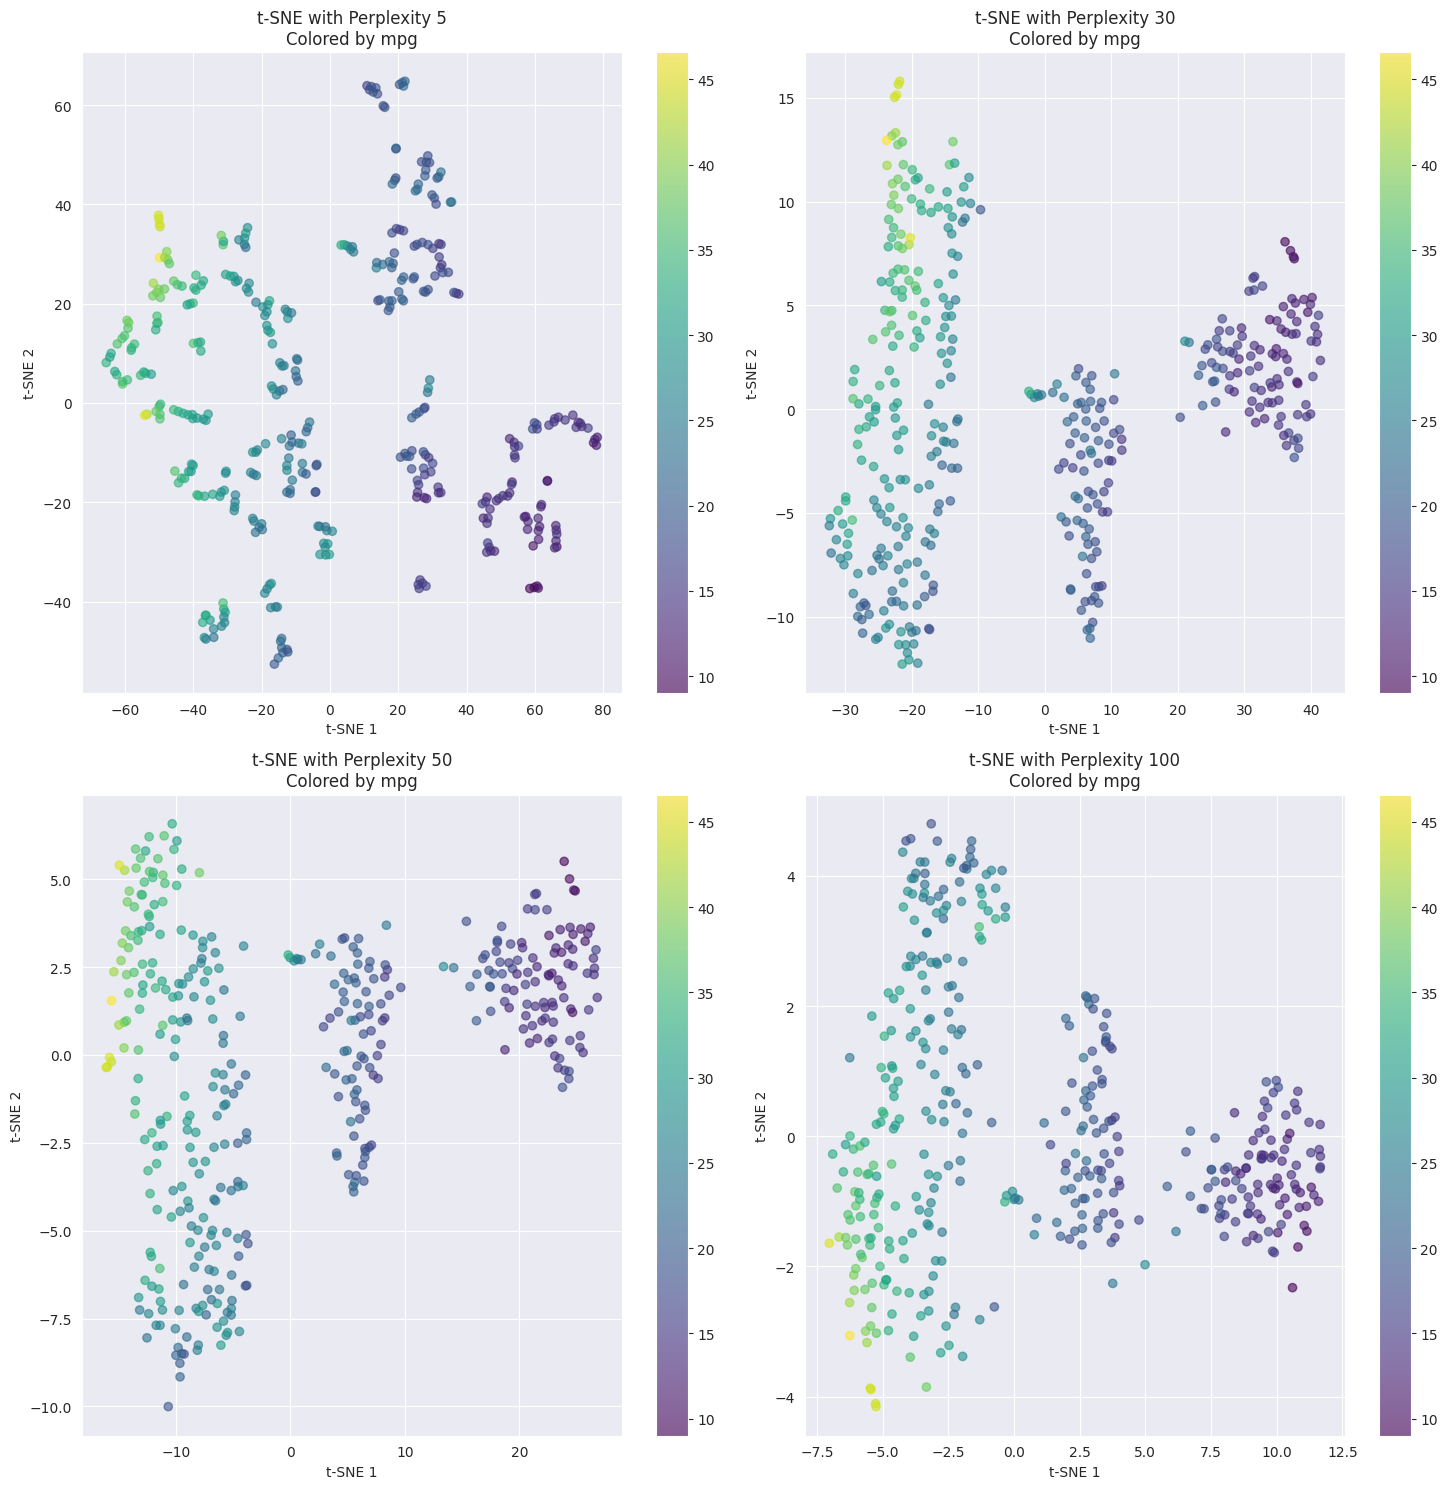

In [ ]:
# Perplexity Analysis
# Test range of perplexity values to find optimal setting
perplexities = [5, 30, 50, 100]
# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()  # Flatten 2D array to 1D for easier iteration

# Create t-SNE plots for each perplexity value
for idx, perp in enumerate(perplexities):
    # Initialise t-SNE with current perplexity value
    tsne = TSNE(n_components=2,           # Project to 2D
                perplexity=perp,          # Current perplexity setting
                random_state=42)          # Set seed for reproducibility

    # Transform data to 2D representation
    tsne_result = tsne.fit_transform(X_scaled)

    # Create visualisation using helper function
    plot_tsne_with_features(tsne_result, df, 'mpg', axes[idx],
                           f't-SNE with Perplexity {perp}')

plt.tight_layout()
plt.show()

# Observations

## Perplexity = 5 (Top Left)
- Most scattered distribution
- Forms multiple small, isolated clusters
- Clear separation between MPG groups
- Potentially over-clustered due to low perplexity
- Scale ranges approximately (-60 to 80, -40 to 60)

## Perplexity = 30 (Top Right)
- More coherent structure
- Three main clusters visible
- Good balance between local and global structure
- Clear MPG gradient
- Scale ranges approximately (-30 to 40, -10 to 15)

## Perplexity = 50 (Bottom Left)
- Similar to perplexity 30 but more compressed
- Maintains cluster separation
- Smoother transitions between groups
- Clearer global structure
- Scale ranges approximately (-10 to 20, -10 to 5)

## Perplexity = 100 (Bottom Right)
- Most compressed distribution
- Three distinct regions still visible
- Some loss of local structure
- Strong global patterns
- Scale ranges approximately (-7.5 to 12.5, -4 to 4)

## Common Patterns Across All Perplexities
- High MPG vehicles (green/yellow) cluster together
- Low MPG vehicles (purple/blue) form separate group
- Consistent color gradient progression
- Clear separation between efficiency groups

## Optimal Choice
Perplexity = 30 appears optimal because it:
- Maintains both local and global structure
- Shows clear separation between groups
- Preserves gradual transitions
- Provides balanced cluster sizes

The key finding is that `perplexity=30` provides the optimal visualisation, showing clear clusters while maintaining both local and global structure. This reveals natural groupings in the data that correspond to different vehicle efficiency segments.

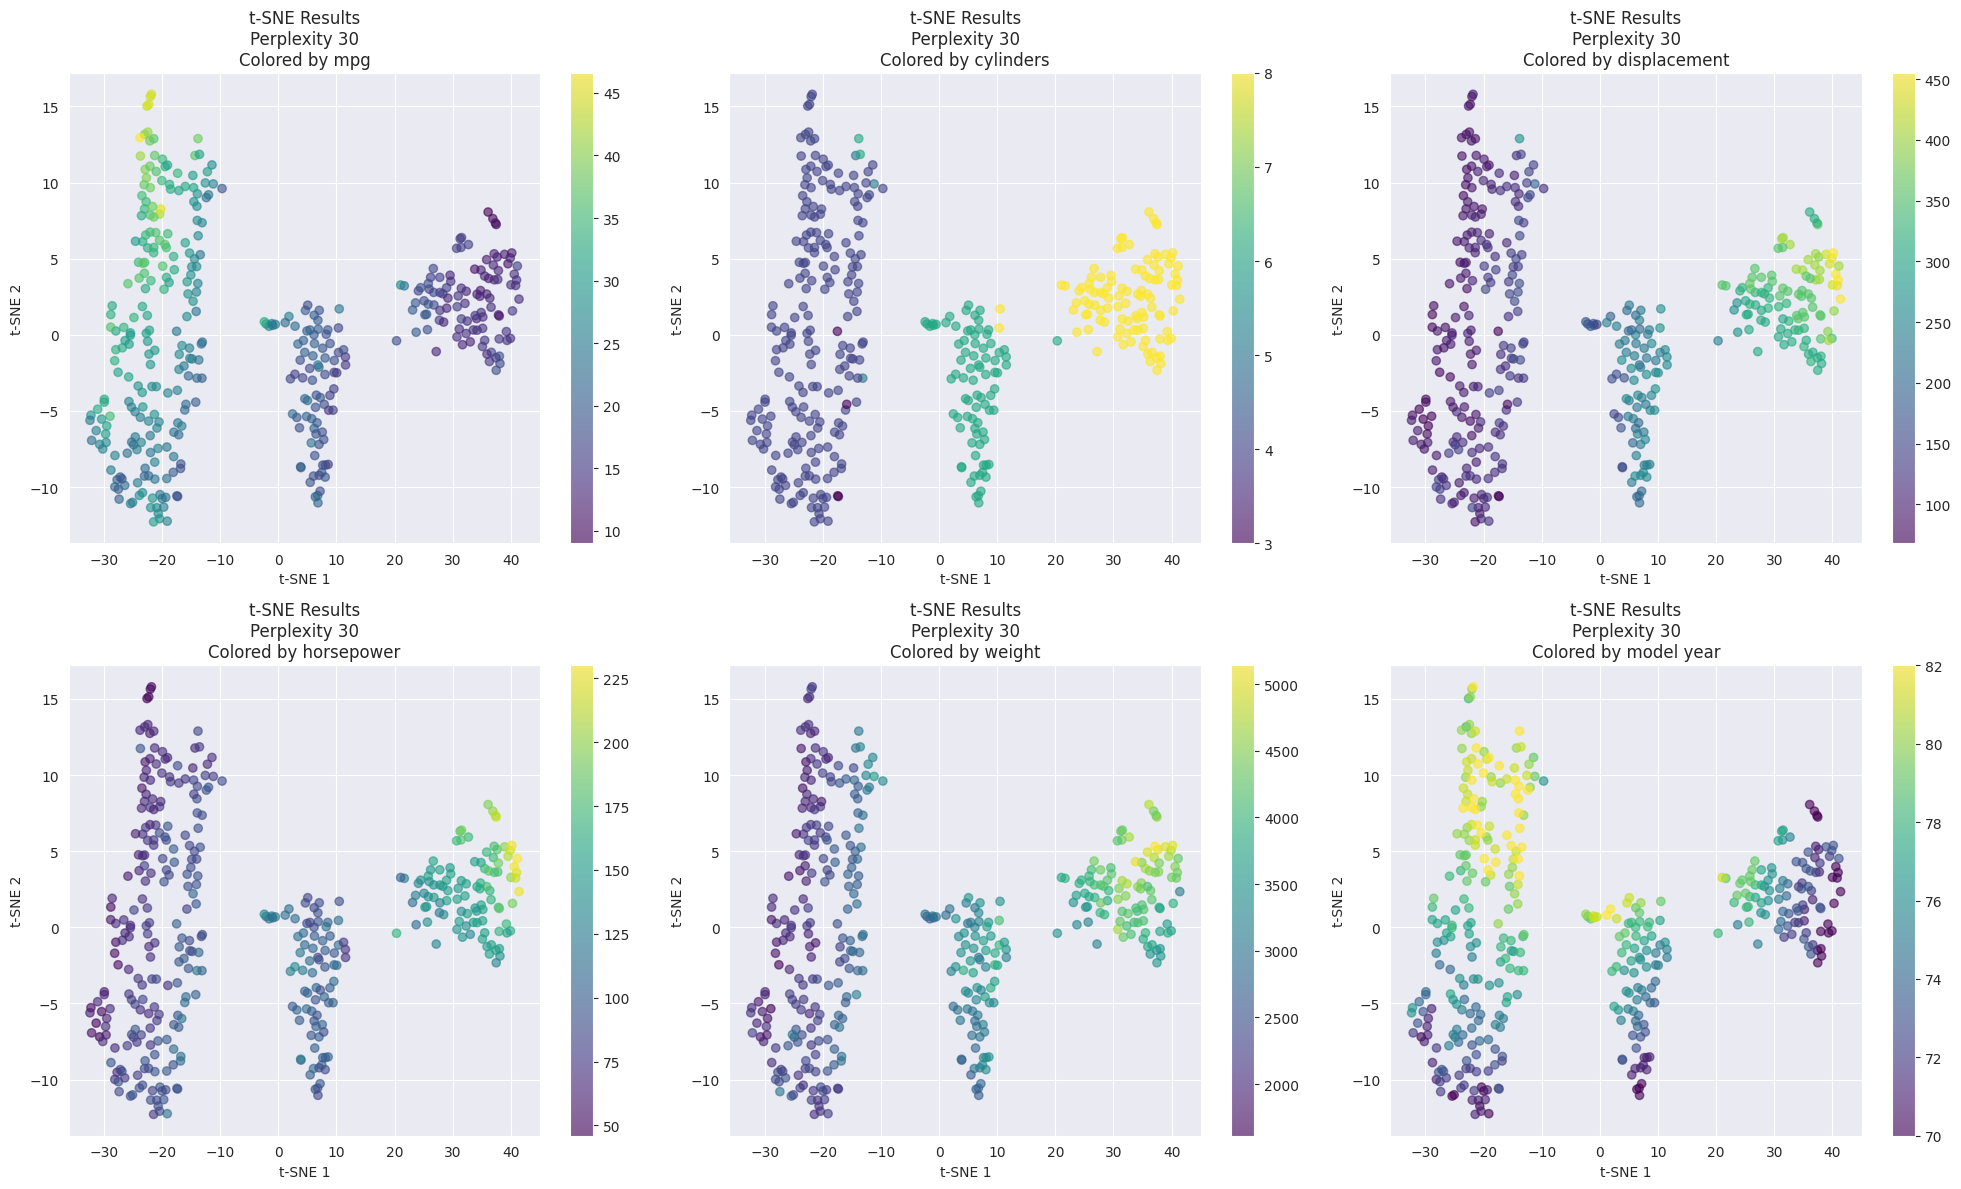

In [ ]:
# Feature Analysis with Optimal t-SNE Parameters
# Use optimal perplexity value determined from previous analysis
optimal_perplexity = 30  # Selected based on visual inspection
# Initialise t-SNE with chosen parameters
tsne = TSNE(n_components=2, perplexity=optimal_perplexity, random_state=42)
# Transform data to 2D space
tsne_result = tsne.fit_transform(X_scaled)

# Define features to analyse
features_to_plot = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'model year']
# Create 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()  # Flatten for easier iteration

# Create separate visualisation for each feature
for idx, feature in enumerate(features_to_plot):
    plot_tsne_with_features(tsne_result, df, feature, axes[idx],
                           f't-SNE Results\nPerplexity {optimal_perplexity}')

plt.tight_layout()
plt.show()

# Observations

## Cluster Patterns

### Three Distinct Groups Visible
1. **Left Group** (around x=-20)
   - Higher MPG
   - Lower cylinder count
   - Smaller displacement
   - Lower horsepower
   - Lower weight
   - Later model years

2. **Central Group** (around x=0)
   - Medium MPG
   - Mixed cylinder counts
   - Moderate displacement
   - Moderate horsepower
   - Medium weight
   - Mixed years

3. **Right Group** (around x=30)
   - Lower MPG
   - Higher cylinder count
   - Larger displacement
   - Higher horsepower
   - Higher weight
   - Earlier model years

## Feature-Specific Insights

### MPG Distribution (Top Left)
- Clear gradient from high (green-yellow) to low (purple)
- Distinct separation between efficiency groups
- Smooth transitions between clusters

### Cylinder Count (Top Middle)
- Clear separation by cylinder count
- 4-cylinders dominant in left cluster
- 8-cylinders dominant in right cluster
- 6-cylinders in transition areas

### Displacement (Top Right)
- Strong correlation with cylinder patterns
- Gradual increase from left to right
- Clear engine size segmentation

### Horsepower (Bottom Left)
- Similar pattern to displacement
- Clear power-based separation
- Performance segments visible

### Weight (Bottom Middle)
- Strong correlation with other size metrics
- Clear weight-based grouping
- Size/efficiency relationship visible

### Model Year (Bottom Right)
- Newer models concentrated left
- Older models to the right
- Shows temporal evolution

## Value of Multi-Feature View
- Shows consistent clustering across features
- Reveals feature relationships
- Demonstrates market segmentation
- Illustrates technological evolution

These t-SNE visualisations with multiple features reveal clear patterns in the data structure and show how different vehicle characteristics relate to each other. The consistency of patterns across different features validates the clustering and helps understand the relationships between vehicle characteristics.

# **KMeans Cluster Analysis in t-SNE Space**

## Generating Statistics  for each Cluster

In [ ]:
# KMeans Clustering and Statistical Analysis
# Initialise KMeans with predetermined number of clusters
n_clusters = 4  # Number chosen based on data distribution analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Set random seed for reproducibility

# Fit KMeans to t-SNE results and get cluster assignments
cluster_labels = kmeans.fit_predict(tsne_result)

# Add cluster assignments to main dataframe for analysis
df['Cluster'] = cluster_labels

# Prepare DataFrame for detailed cluster statistics
cluster_stats = pd.DataFrame()

# Calculate comprehensive statistics for each cluster
for cluster in range(n_clusters):
    # Filter data for current cluster
    cluster_data = df[df['Cluster'] == cluster]

    # Calculate and store detailed statistics for this cluster
    stats = {
        'Size': len(cluster_data),                    # Number of vehicles in cluster
        'Size_Pct': len(cluster_data) / len(df) * 100,  # Percentage of total vehicles
        # Mean and standard deviation for key metrics
        'MPG_Mean': cluster_data['mpg'].mean(),
        'MPG_Std': cluster_data['mpg'].std(),
        'Cylinders_Mean': cluster_data['cylinders'].mean(),
        'Cylinders_Mode': cluster_data['cylinders'].mode().iloc[0],  # Most common cylinder count
        'Weight_Mean': cluster_data['weight'].mean(),
        'Weight_Std': cluster_data['weight'].std(),
        'Horsepower_Mean': cluster_data['horsepower'].mean(),
        'Horsepower_Std': cluster_data['horsepower'].std(),
        'Model_Year_Mean': cluster_data['model year'].mean(),
        'Model_Year_Std': cluster_data['model year'].std(),
        'Displacement_Mean': cluster_data['displacement'].mean(),
        'Displacement_Std': cluster_data['displacement'].std()
    }

    # Add statistics to DataFrame
    cluster_stats[f'Cluster_{cluster}'] = pd.Series(stats)

# Display formatted statistics
print("\nDetailed Cluster Statistics:")
print(cluster_stats.round(2))  # Round to 2 decimal places for readability

# Analyse cluster compactness
cluster_spreads = []
for cluster in range(n_clusters):
    # Get points belonging to current cluster
    cluster_points = tsne_result[cluster_labels == cluster]
    # Calculate average spread (standard deviation) of points
    spread = np.mean(np.std(cluster_points, axis=0))
    cluster_spreads.append(spread)

# Display cluster compactness metrics
print("\nCluster Spreads (lower = more compact):")
for i, spread in enumerate(cluster_spreads):
    print(f"Cluster {i}: {spread:.2f}")


Detailed Cluster Statistics:
                   Cluster_0  Cluster_1  Cluster_2  Cluster_3
Size                  213.00      45.00      57.00      83.00
Size_Pct               53.52      11.31      14.32      20.85
MPG_Mean               29.14      16.44      13.65      19.68
MPG_Std                 5.81       2.83       1.87       3.07
Cylinders_Mean          4.01       7.96       8.00       6.05
Cylinders_Mode          4.00       8.00       8.00       6.00
Weight_Mean          2328.34    4004.76    4202.93    3210.98
Weight_Std            363.35     389.23     479.16     346.54
Horsepower_Mean        79.11     142.82     172.68     101.11
Horsepower_Std         14.65      17.03      26.82      12.14
Model_Year_Mean        77.11      76.69      71.63      75.82
Model_Year_Std          3.74       1.96       1.33       3.16
Displacement_Mean     110.47     321.00     364.95     219.35
Displacement_Std       24.75      33.28      47.13      31.72

Cluster Spreads (lower = more compact):

# Observations

## Cluster 0 - Efficient Vehicles (53.52% of dataset)
- **Size and Distribution**
  * Largest cluster with 213 vehicles
  * High variance in characteristics (spread: 6.30)
  * Represents economy-focused vehicles

- **Efficiency Metrics**
  * MPG: 29.14 ± 5.81
  * Cylinders: Average 4.01 (Mode: 4)
  * Weight: 2328.34 ± 363.35 lbs

- **Performance Characteristics**
  * Horsepower: 79.11 ± 14.65
  * Displacement: 110.47 ± 24.75 cu.in.

- **Temporal Aspect**
  * Average Year: 77.11 ± 3.74
  * Represents later model years
  * Shows trend toward efficiency

## Cluster 1 - High Performance Vehicles (11.31% of dataset)
- **Size and Distribution**
  * 45 vehicles
  * Compact cluster (spread: 2.46)
  * Performance-oriented segment

- **Efficiency Metrics**
  * MPG: 16.44 ± 2.83
  * Cylinders: Average 7.96 (Mode: 8)
  * Weight: 4004.76 ± 389.23 lbs

- **Performance Characteristics**
  * Horsepower: 142.82 ± 17.03
  * Displacement: 321.00 ± 33.28 cu.in.

- **Temporal Aspect**
  * Average Year: 76.69 ± 1.96
  * Mid-period vehicles
  * Consistent characteristics

## Cluster 2 - Traditional Performance (14.32% of dataset)
- **Size and Distribution**
  * 57 vehicles
  * Compact grouping (spread: 2.47)
  * Classic performance segment

- **Efficiency Metrics**
  * MPG: 13.65 ± 1.87
  * Cylinders: Consistently 8 (Mean: 8.00, Mode: 8)
  * Weight: 4202.93 ± 479.16 lbs

- **Performance Characteristics**
  * Horsepower: 172.68 ± 26.82
  * Displacement: 364.95 ± 47.13 cu.in.

- **Temporal Aspect**
  * Average Year: 71.63 ± 1.33
  * Earliest model years
  * Traditional design philosophy

## Cluster 3 - Mid-Range Vehicles (20.85% of dataset)
- **Size and Distribution**
  * 83 vehicles
  * Moderate spread (3.37)
  * Balanced characteristics

- **Efficiency Metrics**
  * MPG: 19.68 ± 3.07
  * Cylinders: Average 6.05 (Mode: 6)
  * Weight: 3210.98 ± 346.54 lbs

- **Performance Characteristics**
  * Horsepower: 101.11 ± 12.14
  * Displacement: 219.35 ± 31.72 cu.in.

- **Temporal Aspect**
  * Average Year: 75.82 ± 3.16
  * Mid to late period
  * Transition era vehicles

## Key Insights

### Clear Market Segmentation
1. Distinct efficiency-performance trade-off
2. Well-defined vehicle categories
3. Strong relationship between size and performance

### Temporal Evolution
1. Shift toward efficiency over time
2. Maintained market segmentation
3. Potential technical advancement patterns


# Implementing KMeans

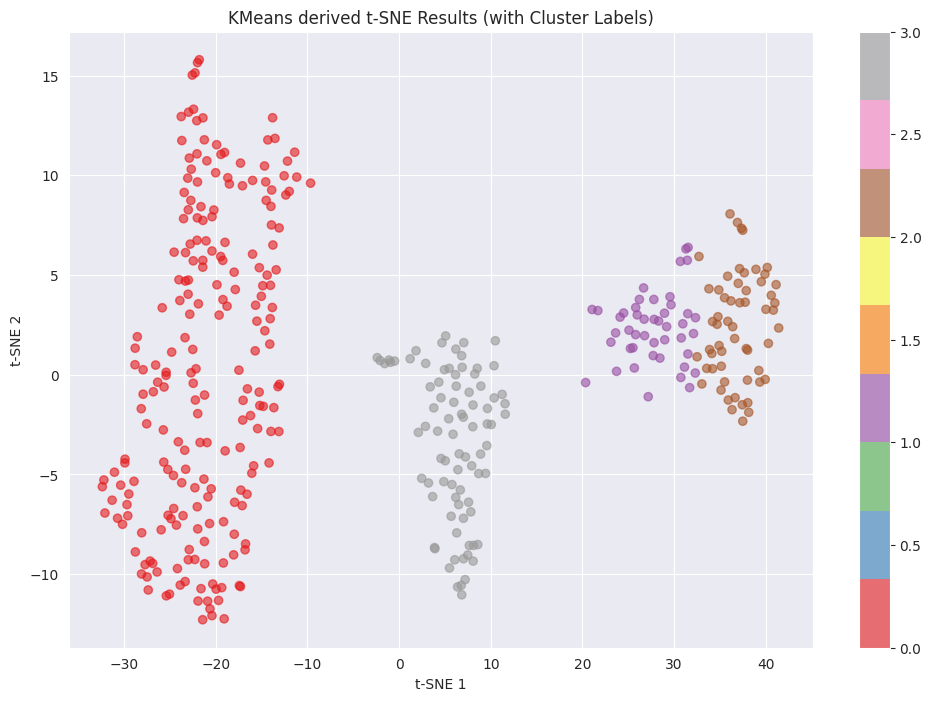

In [ ]:
# Visualise KMeans Clustering Results
# Initialise clustering with same parameters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# Perform clustering on t-SNE results
cluster_labels = kmeans.fit_predict(tsne_result)

# Create visualisation of clustering results
plt.figure(figsize=(12, 8))
# Plot points colored by cluster assignment
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1],
                     c=cluster_labels,  # Use cluster labels for coloring
                     cmap='Set1',       # Discrete colormap for categorical data
                     alpha=0.6)         # Add transparency for better visibility
plt.colorbar(scatter)  # Add color scale showing cluster numbers
plt.title('KMeans derived t-SNE Results (with Cluster Labels)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Observations

## Cluster Identification

### Cluster 0 (Red, Left)
- Largest cluster
- High efficiency vehicles
- Clear vertical spread
- Most modern vehicles
- Characteristics:
  * High MPG
  * Smaller engines
  * Lighter weight
  * Later model years

### Cluster 1 (Gray, Center)
- Transition/intermediate group
- Well-defined central position
- Moderate spread
- Characteristics:
  * Medium MPG
  * Mixed engine sizes
  * Moderate weight
  * Mixed model years

### Cluster 2 (Purple, Middle Right)
- Performance-oriented group
- Compact clustering
- Distinct separation
- Characteristics:
  * Lower MPG
  * Larger engines
  * Heavier vehicles
  * Earlier model years

### Cluster 3 (Brown, Middle Far Right)
- Traditional performance vehicles
- Clear separation
- Dense grouping
- Characteristics:
  * Lowest MPG
  * Largest engines
  * Heaviest vehicles
  * Earliest model years

## Spatial Distribution

### Horizontal Axis (t-SNE 1)
- Clear left-to-right progression
- Efficiency to performance
- Modern to traditional
- Size/power gradient

### Vertical Axis (t-SNE 2)
- Some 'within-cluster' variation
- Subtle sub-groupings
- Secondary characteristics
- Fine-grained differences

## Key Insights

1. **Clear Segmentation**
   - Well-defined clusters
   - Natural groupings
   - Distinct characteristics
   - Minimal overlap

2. **Market Evolution**
   - Left-to-right temporal progression
   - Efficiency improvements over time
   - Maintained market segments
   - Technology transitions

3. **Design Philosophy**
   - Clear efficiency-performance trade-off
   - Distinct vehicle categories
   - Market positioning
   - Engineering choices

## Clustering Quality
- Clean cluster separation
- Natural grouping patterns
- Meaningful segments
- Clear boundaries

The K-Means clustering effectively identifies four distinct vehicle segments in the t-SNE space, showing clear patterns in vehicle evolution and market segmentation. The clustering aligns well with both technical characteristics and temporal progression.

# **Visualise the clusters w.r.t different variables using scatter plot and box plot**

**Scatter Plots**

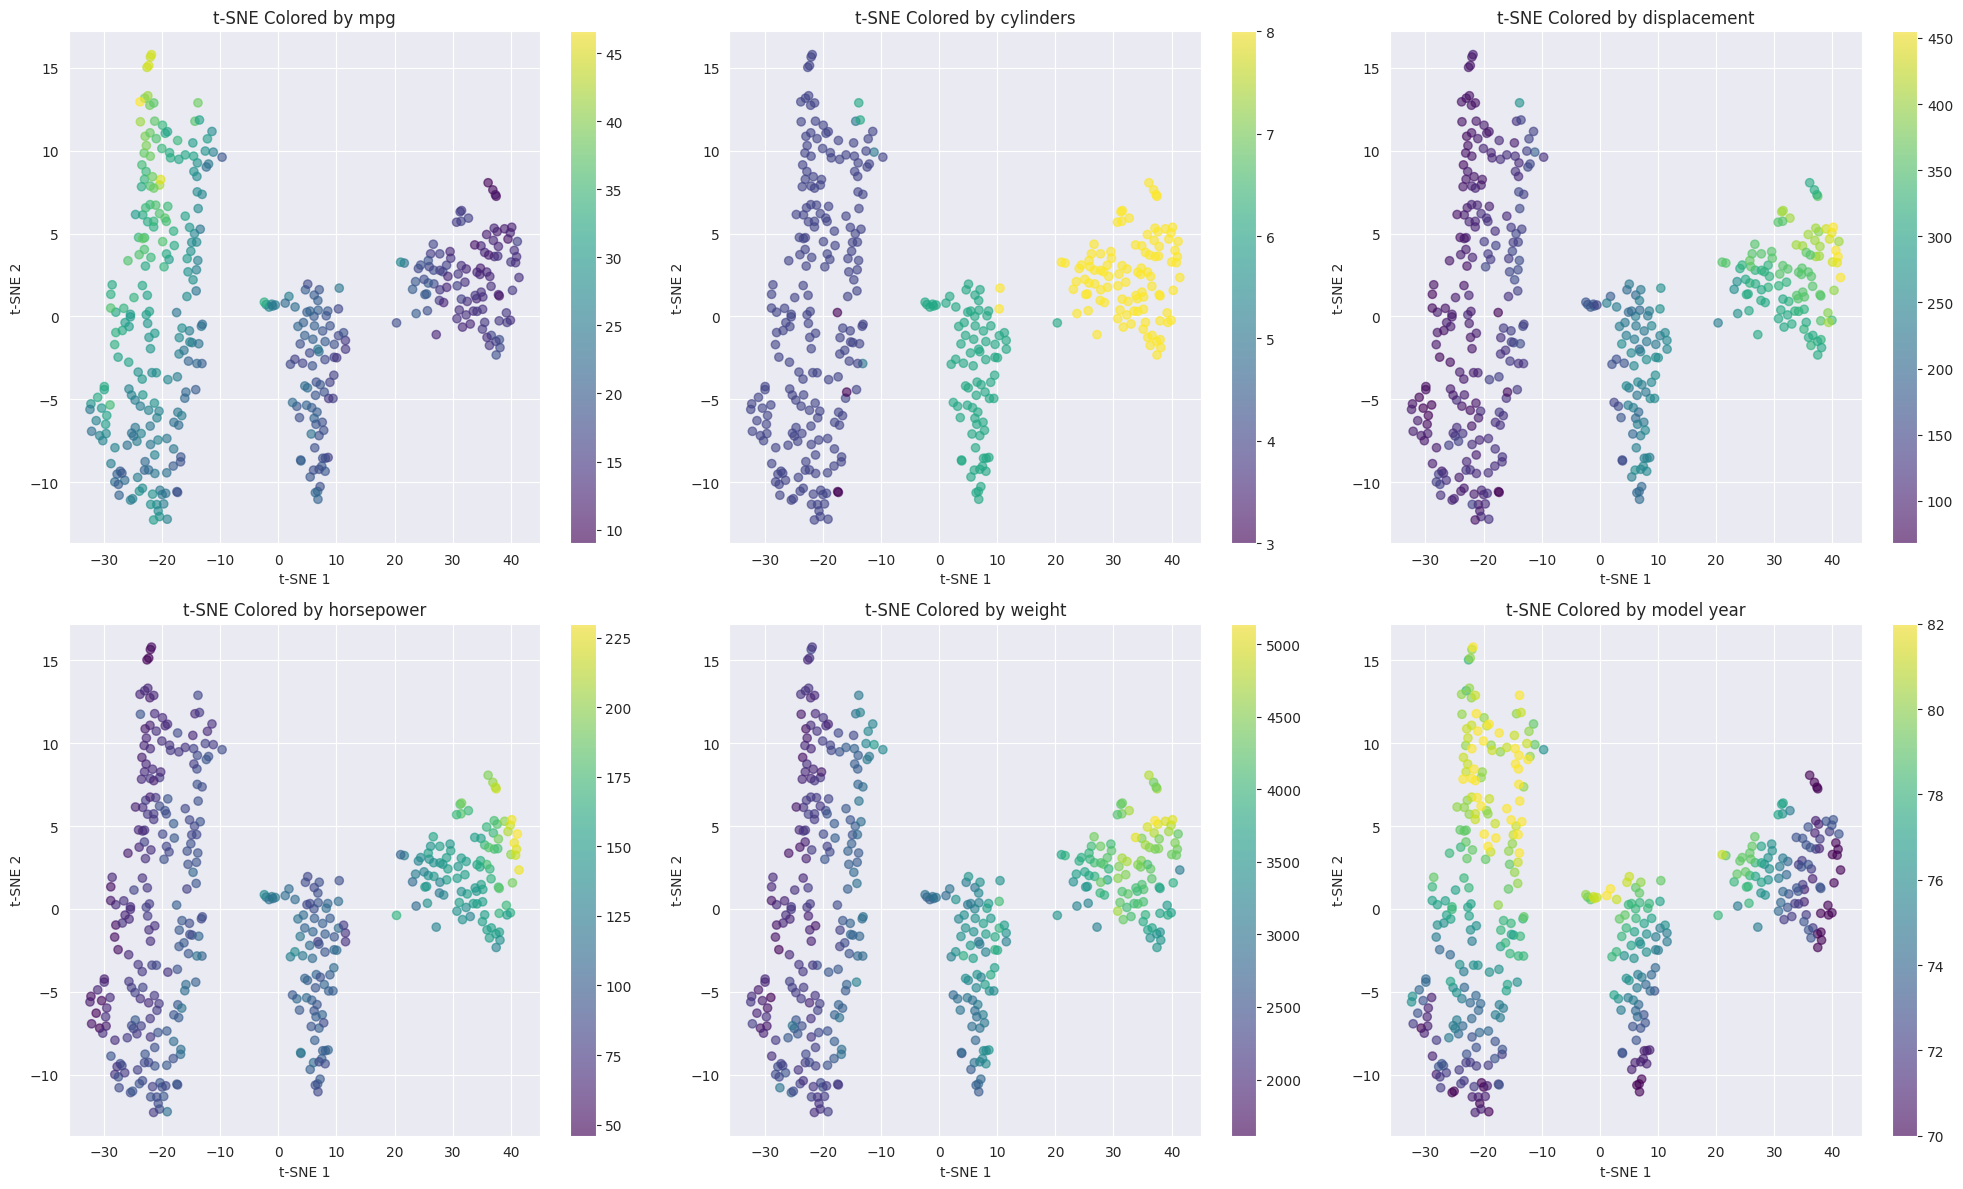

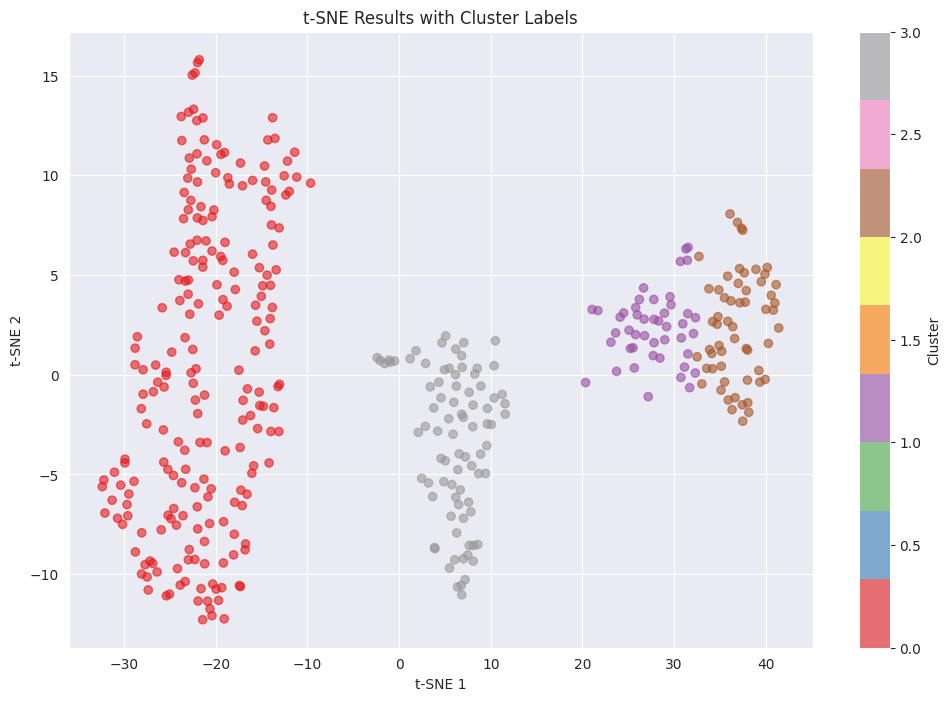

In [ ]:
# Feature and Cluster Visualisation Analysis
# Add cluster assignments to original dataset for reference
df['Cluster'] = cluster_labels

# Specify features for detailed analysis
features_to_plot = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'model year']

# Create multi-plot layout for feature visualisations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()  # Convert 2D array of axes to 1D for easier iteration

# Create visualisations for each feature
for idx, feature in enumerate(features_to_plot):
    # Create scatter plot with feature-based coloring
    scatter = axes[idx].scatter(tsne_result[:, 0], tsne_result[:, 1],
                              c=df[feature],     # Color points by feature value
                              cmap='viridis',    # Use continuous colour scale
                              alpha=0.6)         # Add transparency

    # Customise plot appearance
    axes[idx].set_title(f't-SNE Colored by {feature}')
    plt.colorbar(scatter, ax=axes[idx])  # Add colour scale
    axes[idx].set_xlabel('t-SNE 1')
    axes[idx].set_ylabel('t-SNE 2')

plt.tight_layout()
plt.show()

# Create separate cluster visualisation
plt.figure(figsize=(12, 8))
# Plot points colored by cluster assignment
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1],
                     c=cluster_labels,    # Colour by cluster membership
                     cmap='Set1',         # Use discrete color scheme
                     alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('t-SNE Results with Cluster Labels')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Observations

## Spatial Groups

### Left Group (x ≈ -30)
* **High MPG (35-45)**
  * Appears yellow/bright green in MPG plot
  * Represents highest efficiency vehicles
* **Engine Characteristics**
  * Predominantly 4 cylinders (blue in cylinder plot)
  * Low displacement (purple in displacement plot)
  * Low horsepower (purple in horsepower plot)
* **Vehicle Properties**
  * Light weight (purple in weight plot)
  * Newer model years (yellow/bright green in model year plot)
* **Summary**: Represents efficient, compact vehicles from later years

### Central Group (x ≈ 0)
* **Medium MPG (20-30)**
  * Shows as blue-green in MPG plot
  * Represents moderate efficiency vehicles
* **Engine Characteristics**
  * Mixed cylinder counts (varied colors)
  * Moderate displacement (blue-green)
  * Moderate horsepower (blue-green)
* **Vehicle Properties**
  * Intermediate weight (blue-green)
  * Mixed model years (varied colors)
* **Summary**: Represents mid-range vehicles with balanced characteristics

### Right Group (x ≈ 30-40)
* **Low MPG (10-20)**
  * Appears purple in MPG plot
  * Represents lower efficiency vehicles
* **Engine Characteristics**
  * Predominantly 8 cylinders (yellow)
  * High displacement (yellow/green)
  * High horsepower (yellow/green)
* **Vehicle Properties**
  * Heavy weight (yellow/green)
  * Earlier model years (purple)
* **Summary**: Represents larger, performance-oriented vehicles from earlier years

## Feature-Specific Patterns

### MPG Distribution
* Clear gradient from left (high MPG, yellow/green) to right (low MPG, purple)
* Strong separation between efficiency groups
* Inversely correlates with size/power metrics
* Most discriminative feature for group separation

### Cylinder Count
* Distinct clustering by cylinder count
* Clear progression from 4 cylinders (blue, left) to 8 cylinders (yellow, right)
* Strong correlation with vehicle position in t-SNE space
* Serves as a key categorical separator

### Displacement & Horsepower
* Nearly identical distribution patterns
* Smooth gradient from low (purple) to high (yellow/green)
* Strong positive correlation with each other
* Inversely correlated with MPG
* Key indicators of vehicle size and performance

### Weight
* Follows similar pattern to displacement and horsepower
* Clear separation between vehicle classes
* Gradient from light (purple) to heavy (yellow/green)
* Strongly correlates with other size/power metrics

### Model Year
* Distinct temporal pattern, opposite to other metrics
* Newer models clustered on left (yellow/bright green)
* Older models on right (purple)
* Shows clear evolution of vehicle design over time

## Key Insights
1. Clear market segmentation visible across all features
2. Strong correlations between size/performance metrics
3. Distinct temporal evolution toward efficiency
4. Natural grouping into three main vehicle categories
5. Inverse relationship between efficiency and performance metrics

**Box Plots**

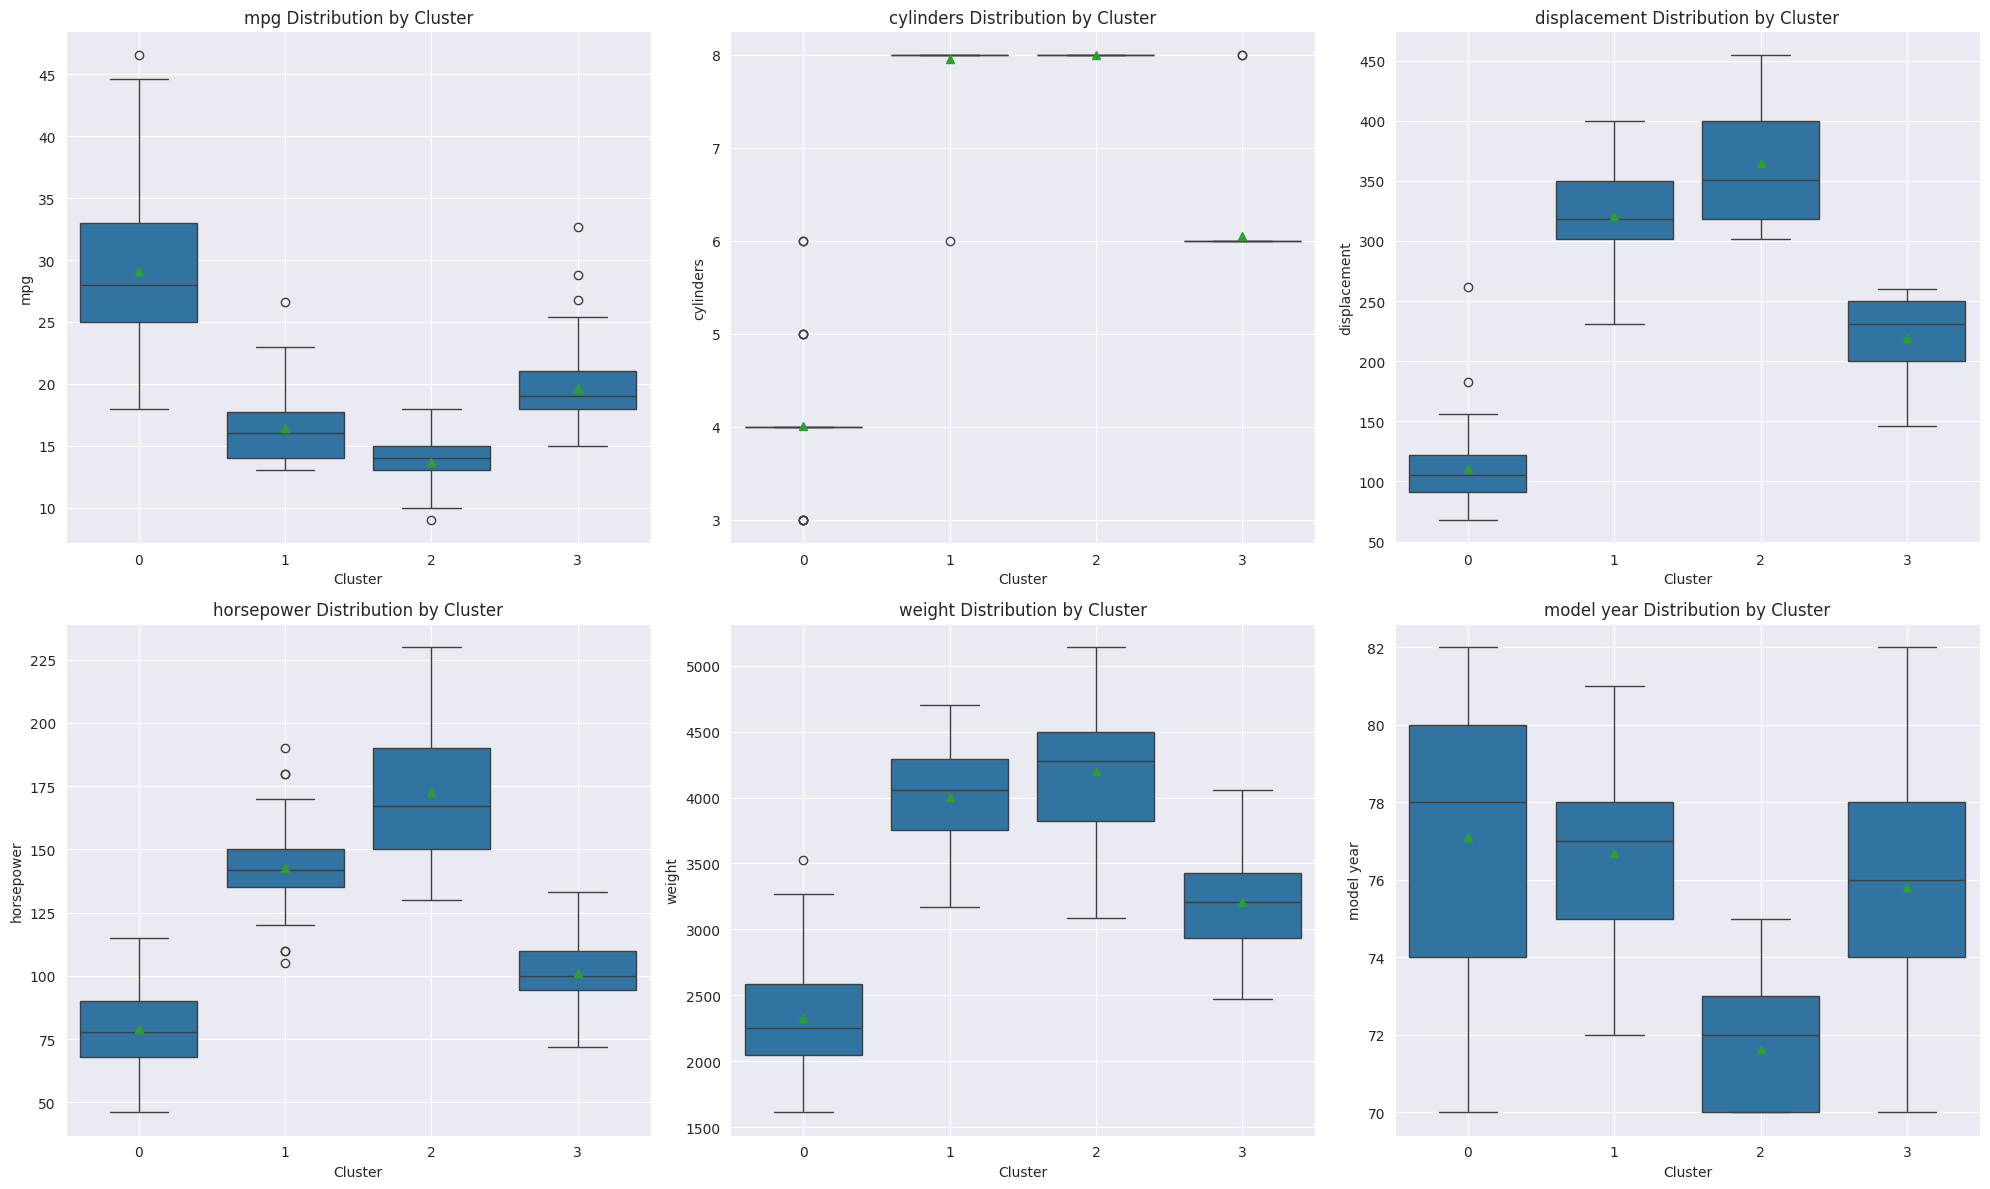

In [ ]:
# Distribution Analysis by Cluster
# Create subplot grid for feature distributions
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

# Create box plots for each feature
for idx, feature in enumerate(features_to_plot):
    # Create box plot showing distribution within clusters
    sns.boxplot(x='Cluster', y=feature,
                data=df,           # Use full dataset
                showmeans=True,    # Show mean markers
                ax=axes[idx])      # Plot on current subplot

    # Customise plot appearance
    axes[idx].set_title(f'{feature} Distribution by Cluster')
    axes[idx].grid(True)  # Add grid for better readability

plt.tight_layout()
plt.show()

# Observations

## MPG Distribution
- **Cluster 0**:
  * Highest median (~28-29 MPG)
  * Wide spread (~18-45 MPG)
  * Several high outliers above 40 MPG
  * Clearly efficiency-focused group

- **Cluster 1**:
  * Low median (~16-17 MPG)
  * Relatively compact distribution
  * Few outliers
  * Performance-oriented segment

- **Cluster 2**:
  * Lowest median (~14-15 MPG)
  * Very compact distribution
  * Performance-focused group
  * One notable outlier near 10 MPG

- **Cluster 3**:
  * Moderate median (~19-20 MPG)
  * Relatively tight distribution
  * Few high outliers around 25-30 MPG
  * Balanced design approach

## Cylinders
- **Cluster 0**:
  * Predominantly 4 cylinders
  * Few outliers at 3, 5, and 6 cylinders
  * Most consistent with efficiency focus
  * Very clear grouping

- **Cluster 1**:
  * Almost exclusively 8 cylinders
  * Extremely consistent distribution
  * Performance-oriented design
  * No outliers

- **Cluster 2**:
  * Consistently 8 cylinders
  * Most uniform distribution
  * Traditional performance design
  * No outliers

- **Cluster 3**:
  * Primarily 6 cylinders
  * Some 8-cylinder variants
  * Intermediate design philosophy
  * Shows transition between segments

## Displacement
- **Cluster 0**:
  * Smallest engines (~100-150 cu.in.)
  * Some outliers up to ~250 cu.in.
  * Tight distribution
  * Efficiency-focused design

- **Cluster 1**:
  * Large engines (~300-350 cu.in.)
  * Relatively wide distribution
  * Performance category
  * Several high outliers

- **Cluster 2**:
  * Largest engines (~350-400 cu.in.)
  * Widest displacement range
  * Traditional performance design
  * Multiple outliers above 400 cu.in.

- **Cluster 3**:
  * Medium displacement (~200-250 cu.in.)
  * Compact distribution
  * Clear intermediate positioning
  * Few outliers

## Horsepower
- **Cluster 0**:
  * Lowest power (~70-90 hp)
  * Some outliers up to ~120 hp
  * Efficiency-oriented design
  * Consistent grouping

- **Cluster 1**:
  * High power (~140-150 hp)
  * Several outliers above 175 hp
  * Performance-focused
  * Wider spread than Cluster 2

- **Cluster 2**:
  * Highest power (~170-180 hp)
  * Multiple outliers above 200 hp
  * Traditional performance design
  * Widest power range

- **Cluster 3**:
  * Moderate power (~100-110 hp)
  * Very compact distribution
  * Few outliers
  * Balanced performance characteristics

## Weight
- **Cluster 0**:
  * Lightest vehicles (~2000-2500 lbs)
  * Some heavier outliers
  * Consistent with efficiency focus
  * Compact distribution

- **Cluster 1**:
  * Heavy vehicles (~3800-4200 lbs)
  * Wide distribution
  * Performance orientation
  * Several outliers

- **Cluster 2**:
  * Heaviest group (~4000-4500 lbs)
  * Widest weight range
  * Traditional large car design
  * Multiple high outliers

- **Cluster 3**:
  * Mid-weight (~3000-3500 lbs)
  * Compact distribution
  * Clear intermediate positioning
  * Few outliers

## Model Year
- **Cluster 0**:
  * Newest models (median ~78)
  * Wide range (73-82)
  * Modern design philosophy
  * Efficiency trend visible

- **Cluster 1**:
  * Mid-late years (median ~77)
  * Moderate range
  * Transitional period
  * Performance focus maintained

- **Cluster 2**:
  * Earliest years (median ~71-72)
  * Narrow range
  * Traditional design era
  * Pre-efficiency focus

- **Cluster 3**:
  * Mixed years (median ~76)
  * Wide range
  * Transition period designs
  * Balanced approach visible

## Take Aways
1. Clear progression from traditional performance (Cluster 2) to modern efficiency (Cluster 0)
2. Distinct market segmentation visible across all metrics
3. Strong correlation between engine size, power, and weight
4. Temporal evolution showing industry-wide shift toward efficiency
5. Cluster 3 consistently represents intermediate design philosophy

# Performance Evaluation: PCA and t-SNE

Using existing variables defined earlier in this Notebook:

- `pca_result` from earlier PCA analysis
- `tsne_result` from earlier t-SNE analysis
- `cluster_labels` from existing clustering

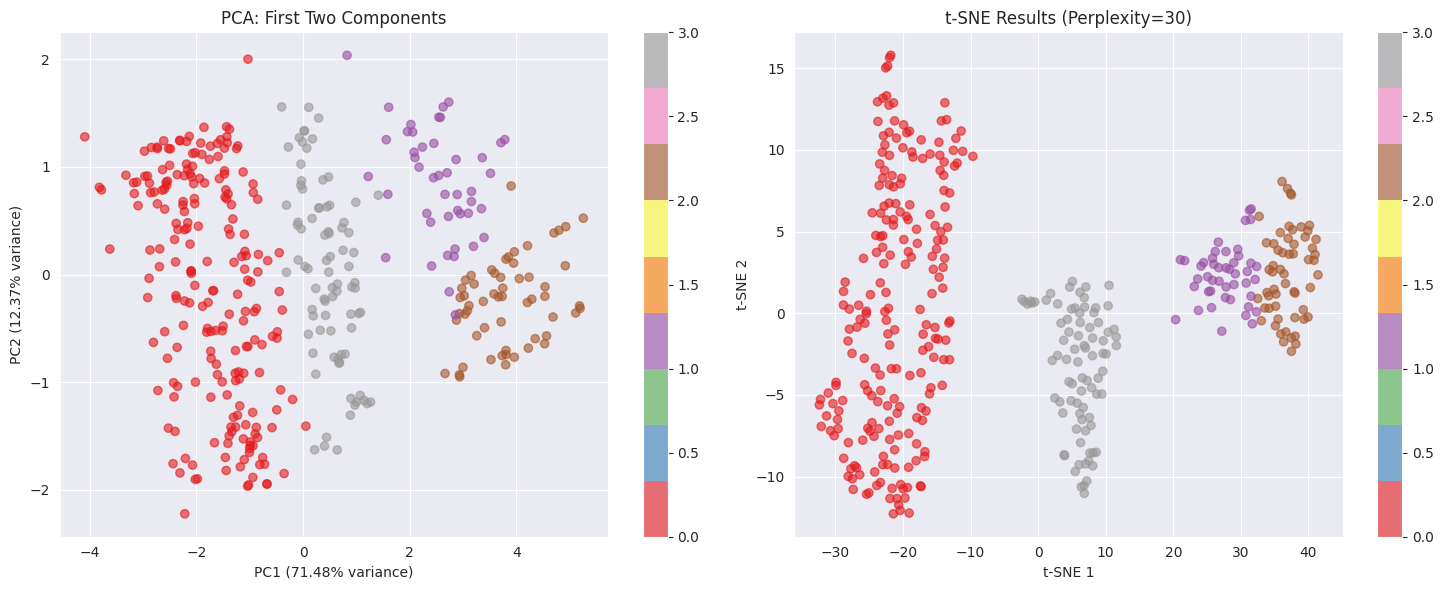


Clustering Quality Comparison:
PCA Silhouette Score: 0.2956
t-SNE Silhouette Score: 0.5959


In [ ]:
# Comparison of PCA and t-SNE Results
# Create figure for side-by-side comparison
plt.figure(figsize=(15, 6))

# Plot 1: PCA Results
plt.subplot(1, 2, 1)
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                     c=cluster_labels,    # Color by cluster
                     cmap='Set1',         # Use categorical colors
                     alpha=0.6)
plt.colorbar(scatter)
plt.title('PCA: First Two Components')
# Add labels with variance explained
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(True)

# Plot 2: t-SNE Results
plt.subplot(1, 2, 2)
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1],
                     c=cluster_labels,    # Color by cluster
                     cmap='Set1',         # Use same color scheme as PCA
                     alpha=0.6)
plt.colorbar(scatter)
plt.title('t-SNE Results (Perplexity=30)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)

plt.tight_layout()
plt.show()

# Clustering Quality Assessment
print("\nClustering Quality Comparison:")
# Calculate silhouette scores for both dimensionality reduction methods
# Silhouette score ranges from -1 to 1, higher is better
pca_silhouette = silhouette_score(pca_result, cluster_labels)
tsne_silhouette = silhouette_score(tsne_result, cluster_labels)
# Display results
print(f"PCA Silhouette Score: {pca_silhouette:.4f}")  # Score for PCA clustering
print(f"t-SNE Silhouette Score: {tsne_silhouette:.4f}")  # Score for t-SNE clustering

# Observations

## Clustering Quality
- t-SNE shows significantly better clustering (Silhouette Score: 0.5959)
- PCA shows moderate cluster separation (Silhouette Score: 0.2956)
- ~30% improvement in clustering quality with t-SNE

## Visual Comparison

### PCA Visualisation
1. **Data Structure**
   - PC1 explains 71.48% of variance
   - Linear separation primarily along PC1
   - Some cluster overlap but distinguishable
   - Global structure preserved

2. **Cluster Distribution**
   - Red points (Cluster 0) on the the left
   - Gray points (Cluster 1) in the centre-right
   - Purple points (Cluster 2) in the centre-far right
   - Brown points (Cluster 3) on the far right

### t-SNE Visualisation
1. **Data Structure**
   - Enhanced cluster separation
   - More distinct groupings
   - Local relationships preserved
   - Non-linear patterns visible

2. **Cluster Distribution**
   - Red points (Cluster 0) form elongated group on left (-30 on x-axis)
   - Gray points (Cluster 1) form vertical column in center (0 on x-axis)
   - Purple and Brown points (Clusters 2 & 3) well-separated on right (~20-40 on x-axis)

## Key Differences

1. **Separation Quality**
   - t-SNE shows clearer cluster boundaries
   - PCA maintains more continuous distribution
   - t-SNE provides better between-cluster separation
   - PCA preserves linear relationships between clusters

2. **Data Structure**
   - PCA preserves global variance structure
   - t-SNE emphasises local patterns and relationships
   - PCA shows clear linear progression along principal components
   - t-SNE highlights non-linear relationships between groups

3. **Interpretability**
   - PCA provides explicit variance explanation (71.48% for PC1)
   - t-SNE offers better visual cluster separation
   - PCA axes have direct feature interpretation
   - t-SNE better for pattern recognition and group identification

## Take Aways

1. **Use PCA for:**
   - Understanding variance structure
   - Linear dimensionality reduction
   - Feature importance analysis
   - Global pattern analysis
   - When axis interpretation is important

2. **Use t-SNE for:**
   - Cluster visualisation and identification
   - Pattern recognition
   - Local structure analysis
   - Non-linear relationship exploration
   - When cluster separation is priority

## Additional Insights
- Complementary nature of both techniques evident
- PCA confirms major variance in data is meaningful (71.48%)
- t-SNE validates the presence of natural groupings
- Both methods support the 4-cluster interpretation
- Consistent cluster patterns across both visualisations despite different approaches

## **Actionable Insights and Recommendations**

# Executive Summary

Advanced analysis of SecondLife's vintage car dataset (1970-1982) using Principal Component Analysis (PCA) and t-SNE revealed four distinct market segments, characterised by clear trade-offs between efficiency and performance. The analysis identified that while vehicle size and power characteristics account for 71.5% of data variation, temporal evolution in design and technology explains an additional 12.4%. This segmentation shows a clear market transition from performance-focused vehicles (predominantly 8-cylinder, low MPG) in the early 1970s to more efficient models (4-cylinder, high MPG) by the early 1980s.

These findings suggest specific strategic opportunities for SecondLife. The dealership should structure its inventory and marketing around the four identified segments: efficiency-focused vehicles (53.5% of market, averaging 29.1 MPG), high-performance vehicles (11.3%, averaging 16.4 MPG), traditional performance vehicles (14.3%, averaging 13.7 MPG), and mid-range vehicles (20.9%, averaging 19.7 MPG).

Each segment demonstrates distinct characteristics in terms of engine size, weight, and fuel efficiency, indicating the need for targeted marketing strategies, segment-specific pricing models, and specialised maintenance programs. This data-driven approach to market segmentation can help optimise inventory mix, improve customer targeting, and enhance overall business performance.

# Actionable Insights and Recommendations

## 1. Vehicle Segmentation Strategy

### Insights
- Clear identification of four distinct vehicle segments
- Strong correlation between physical characteristics and efficiency
- Temporal evolution in vehicle design preferences

### Recommendations
1. **Inventory Segmentation**
   - Categorise vintage cars into four distinct price tiers
   - Align marketing strategies with segment characteristics
   - Optimise inventory mix based on segment demand

2. **Pricing Strategy**
   - Develop segment-specific pricing models
   - Consider rarity and historical significance
   - Factor in segment-specific maintenance costs

## 2. Market Targeting

### Insights
- Different customer preferences across segments
- Clear efficiency vs. performance trade-offs
- Temporal trends in vehicle characteristics

### Recommendations
1. **Customer Segmentation**
   - Target collectors for high-performance vintage models
   - Focus on practical classic car buyers for efficient models
   - Develop specific marketing for each segment

2. **Marketing Approach**
   - Emphasise historical significance for performance segments
   - Highlight efficiency for economy segments
   - Focus on uniqueness for transition-era vehicles

## 3. Inventory Management

### Insights
- Strong relationships between vehicle characteristics
- Clear evolution in design preferences
- Distinct value propositions across segments

### Recommendations
1. **Stock Balance**
   - Maintain diverse inventory across segments
   - Focus on well-preserved examples from each era
   - Balance between performance and efficiency models

2. **Acquisition Strategy**
   - Prioritise vehicles with segment-defining characteristics
   - Look for unique transition-period models
   - Focus on historically significant examples

## 4. Technical Considerations

### Insights
- Strong correlations between mechanical features
- Clear technological evolution patterns
- Distinct maintenance requirements by segment

### Recommendations
1. **Maintenance Planning**
   - Develop segment-specific maintenance programs
   - Stock appropriate parts for each segment
   - Train staff on era-specific technologies

2. **Documentation Requirements**
   - Maintain detailed technical records
   - Document historical significance
   - Track maintenance history

## 5. Business Development

### Insights
- Market segments have distinct characteristics
- Clear value propositions for each segment
- Evolution in consumer preferences

### Recommendations
1. **Service Development**
   - Create segment-specific service packages
   - Develop restoration programs
   - Offer customisation options

2. **Partnership Opportunities**
   - Collaborate with segment-specific clubs
   - Partner with restoration specialists
   - Develop relationships with parts suppliers

## 6. Future Growth Strategies

### Insights
- Clear market segmentation
- Strong segment-specific characteristics
- Evolving market preferences

### Recommendations
1. **Expansion Plans**
   - Focus on underserved segments
   - Develop segment-specific expertise
   - Consider geographical expansion

2. **Market Development**
   - Create segment-specific events
   - Develop online presence for each segment
   - Build community around each segment

## 7. Risk Management

### Insights
- Segment-specific value drivers
- Clear maintenance requirements
- Distinct market dynamics

### Recommendations
1. **Risk Mitigation**
   - Diversify inventory across segments
   - Maintain balanced pricing strategy
   - Develop multiple supplier relationships

2. **Quality Control**
   - Implement segment-specific inspection protocols
   - Develop authentication processes
   - Maintain detailed documentation

## 8. Performance Monitoring

### Insights
- Clear segment performance metrics
- Distinct value propositions
- Measurable market trends

### Recommendations
1. **KPI Development**
   - Create segment-specific performance metrics
   - Monitor segment profitability
   - Track market share by segment

2. **Reporting Systems**
   - Implement segment-based reporting
   - Track inventory turnover by segment
   - Monitor customer satisfaction by segment

## 9. Staff Development

### Insights
- Distinct segment characteristics
- Specific technical requirements
- Clear customer preferences

### Recommendations
1. **Training Programs**
   - Develop segment-specific training
   - Build technical expertise
   - Enhance customer service skills

2. **Specialisation**
   - Assign segment specialists
   - Develop expert teams
   - Create knowledge sharing systems

## 10. Technology Integration

### Insights
- Clear data patterns
- Distinct segment characteristics
- Measurable performance metrics

### Recommendations
1. **Systems Development**
   - Implement segment-based inventory management
   - Develop customer tracking systems
   - Create maintenance tracking tools

2. **Data Utilisation**
   - Use analytics for inventory decisions
   - Track segment performance
   - Monitor market trends

In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Applied Data Science Program/Main Modules/Elective Project - DataVis/Auto_MPG/Final_MQ_PCA_and_tSNE_Project_FullCode_version.ipynb'


[NbConvertApp] Converting notebook /content/drive/MyDrive/Applied Data Science Program/Main Modules/Elective Project - DataVis/Auto_MPG/Final_MQ_PCA_and_tSNE_Project_FullCode_version.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 19 image(s).
[NbConvertApp] Writing 5865216 bytes to /content/drive/MyDrive/Applied Data Science Program/Main Modules/Elective Project - DataVis/Auto_MPG/Final_MQ_PCA_and_tSNE_Project_FullCode_version.html
